In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from scipy import stats
import statsmodels.stats.weightstats as smws

In [3]:
mapping = {'approach': 1, 'withdrawal': 0, 'inactive_approach': 1, 'inactive_withdrawal': 0}

In [4]:
def get_withdrawal_bias_cue12(subset_df):
#     window_len = len(subset_df)
    window_len = 1
    cue1_choices = np.array(subset_df.loc[subset_df['cue1']==1]['Action'].replace(mapping))
    cue2_choices = np.array(subset_df.loc[subset_df['cue2']==1]['Action'].replace(mapping))
    
    # Approach in cue 1 is accurate
    # Withdrawal in cue 2 is accurate
    
    # Withdrawal bias is correct actions in cue2 minus correct actions in cue1
    
    # print("Withdrawal in Cue 2:", (sum(cue2_choices==0)))
    # print("Approach in Cue 1:", sum(cue1_choices))
#     print(window_len)
    withdrawal_bias_cue = (sum(cue2_choices==0) - sum(cue1_choices))/window_len
    return withdrawal_bias_cue

def get_withdrawal_bias_cue34(subset_df):
#     window_len = len(subset_df)
    window_len = 1
    cue3_choices = np.array(subset_df.loc[subset_df['cue3']==1]['Action'].replace(mapping))
    cue4_choices = np.array(subset_df.loc[subset_df['cue4']==1]['Action'].replace(mapping))
    
    # Approach in cue 3 is accurate in second half
    # Withdrawal in cue 4 is accurate in second half
    
    # Withdrawal bias in first half is withdrawals more than number of approaches for both cue3 and cue4
    # Withdrawal bias in second half is correct actions in cue4 minus correct actions in cue3
    
    withdrawal_bias_uncontrollablecue3 = (sum(cue3_choices==0) - sum(cue3_choices))/window_len
    withdrawal_bias_uncontrollablecue4 = (sum(cue4_choices==0) - sum(cue4_choices))/window_len
    withdrawal_bias_controllable = ((sum(cue4_choices==0)) - sum(cue3_choices))/window_len
    return withdrawal_bias_uncontrollablecue3, withdrawal_bias_uncontrollablecue4, withdrawal_bias_controllable

In [5]:
def get_all_approach_withdrawal_times(subset_df):
    window_len = len(subset_df)
    subset_df = subset_df.replace(mapping)
    approach_reaction_times = subset_df.loc[subset_df['Action']==1]['ReactionTime']
    withdrawal_choices_reaction_times = subset_df.loc[subset_df['Action']==0]['ReactionTime']
    
    return np.mean(approach_reaction_times), np.mean(withdrawal_choices_reaction_times)

In [6]:
def get_cuewise_approach_reactiontimes(subset_df):
    window_len = len(subset_df)
    cue1_choices_reaction_times = subset_df.loc[subset_df['cue1']==1][['Action', 'ReactionTime']].replace(mapping)
    cue2_choices_reaction_times = subset_df.loc[subset_df['cue2']==1][['Action', 'ReactionTime']].replace(mapping)
    cue3_choices_reaction_times = subset_df.loc[subset_df['cue3']==1][['Action', 'ReactionTime']].replace(mapping)
    cue4_choices_reaction_times = subset_df.loc[subset_df['cue4']==1][['Action', 'ReactionTime']].replace(mapping)
    
    cue1_approach_times = cue1_choices_reaction_times.loc[cue1_choices_reaction_times['Action']==1]['ReactionTime']
    cue2_approach_times = cue2_choices_reaction_times.loc[cue2_choices_reaction_times['Action']==1]['ReactionTime']
    cue3_approach_times = cue3_choices_reaction_times.loc[cue3_choices_reaction_times['Action']==1]['ReactionTime']
    cue4_approach_times = cue4_choices_reaction_times.loc[cue4_choices_reaction_times['Action']==1]['ReactionTime']
    
    return np.mean(cue1_approach_times), np.mean(cue2_approach_times), np.mean(cue3_approach_times), np.mean(cue4_approach_times)


def get_cuewise_withdrawal_reactiontimes(subset_df):
    window_len = len(subset_df)
    cue1_choices_reaction_times = subset_df.loc[subset_df['cue1']==1][['Action', 'ReactionTime']].replace(mapping)
    cue2_choices_reaction_times = subset_df.loc[subset_df['cue2']==1][['Action', 'ReactionTime']].replace(mapping)
    cue3_choices_reaction_times = subset_df.loc[subset_df['cue3']==1][['Action', 'ReactionTime']].replace(mapping)
    cue4_choices_reaction_times = subset_df.loc[subset_df['cue4']==1][['Action', 'ReactionTime']].replace(mapping)
    
    cue1_withdrawal_times = cue1_choices_reaction_times.loc[cue1_choices_reaction_times['Action']==0]['ReactionTime']
    cue2_withdrawal_times = cue2_choices_reaction_times.loc[cue2_choices_reaction_times['Action']==0]['ReactionTime']
    cue3_withdrawal_times = cue3_choices_reaction_times.loc[cue3_choices_reaction_times['Action']==0]['ReactionTime']
    cue4_withdrawal_times = cue4_choices_reaction_times.loc[cue4_choices_reaction_times['Action']==0]['ReactionTime']
    
    return np.mean(cue1_withdrawal_times), np.mean(cue2_withdrawal_times), np.mean(cue3_withdrawal_times), np.mean(cue4_withdrawal_times)

In [7]:
# # subj_range = [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,23,24,25,26,27,28]
# subj_range = [4,5,6,7,8,9,10,12,13,14,15,16,18,19,21,24,25,26,28]
# print(len(subj_range))
# # subj_range = [4,5,6,7,8,9,10,12,13,14,15,16,18,19]
# subj_range

In [8]:
nsubj=32
all_subj = list(np.arange(1,nsubj+1))
pilots = [1,2]
withdrawn = [20]
patient = [22]
meds = [10] #using? yes
# non_learner = [3,30,32] #non_learner_threshold 110
non_learner = [3] #non_learner_threshold 115
high_tolerance = [11,17,23,27,29,30] # tolerance upto 25mA #30 could double counted if threshold is 110


new_subj_list = all_subj
new_subj_list = [subj for subj in new_subj_list if subj not in pilots]
new_subj_list = [subj for subj in new_subj_list if subj not in withdrawn]
new_subj_list = [subj for subj in new_subj_list if subj not in patient]
# new_subj_list = [subj for subj in new_subj_list if subj not in non_learner]
# new_subj_list = [subj for subj in new_subj_list if subj not in high_tolerance]
# new_subj_list = [subj for subj in new_subj_list if subj not in meds]

In [9]:
new_subj_list

[3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32]

In [10]:
len(new_subj_list)

28

In [23]:
subj_range = new_subj_list
non_learner_threshold = 115

In [100]:
num_approach = []
num_withdrawal = []
num_inactive_approach = []
num_inactive_withdrawal = []
num_punishments = []

firsthalf_withdrawal_bias_cue12_list = []
secondhalf_withdrawal_bias_cue12_list = []
firsthalf_withdrawal_bias_cue34_list = []
secondhalf_withdrawal_bias_cue34_list = []

Q1_withdrawal_bias_cue12_list = []
Q2_withdrawal_bias_cue12_list = []
Q3_withdrawal_bias_cue12_list = []
Q4_withdrawal_bias_cue12_list = []

Q1_withdrawal_bias_cue34_list = []
Q2_withdrawal_bias_cue34_list = []
Q3_withdrawal_bias_cue34_list = []
Q4_withdrawal_bias_cue34_list = []

firsthalf_approach_times_list = []
secondhalf_approach_times_list = []

firsthalf_withdrawal_times_list = []
secondhalf_withdrawal_times_list = []

Q1_approach_times_list = []
Q2_approach_times_list = []
Q3_approach_times_list = []
Q4_approach_times_list = []

Q1_withdrawal_times_list = []
Q2_withdrawal_times_list = []
Q3_withdrawal_times_list = []
Q4_withdrawal_times_list = []

Q1_approach_times_cue1_list = []
Q2_approach_times_cue1_list = []
Q3_approach_times_cue1_list = []
Q4_approach_times_cue1_list = []

Q1_approach_times_cue2_list = []
Q2_approach_times_cue2_list = []
Q3_approach_times_cue2_list = []
Q4_approach_times_cue2_list = []

Q1_approach_times_cue3_list = []
Q2_approach_times_cue3_list = []
Q3_approach_times_cue3_list = []
Q4_approach_times_cue3_list = []

Q1_approach_times_cue4_list = []
Q2_approach_times_cue4_list = []
Q3_approach_times_cue4_list = []
Q4_approach_times_cue4_list = []

Q1_withdrawal_times_cue1_list = []
Q2_withdrawal_times_cue1_list = []
Q3_withdrawal_times_cue1_list = []
Q4_withdrawal_times_cue1_list = []

Q1_withdrawal_times_cue2_list = []
Q2_withdrawal_times_cue2_list = []
Q3_withdrawal_times_cue2_list = []
Q4_withdrawal_times_cue2_list = []

Q1_withdrawal_times_cue3_list = []
Q2_withdrawal_times_cue3_list = []
Q3_withdrawal_times_cue3_list = []
Q4_withdrawal_times_cue3_list = []

Q1_withdrawal_times_cue4_list = []
Q2_withdrawal_times_cue4_list = []
Q3_withdrawal_times_cue4_list = []
Q4_withdrawal_times_cue4_list = []

for subj_num in subj_range:
    print(subj_num)
    subj_str = str(subj_num).zfill(2)
    try:
        behavioural_df = pd.read_csv('FishTaskPilotData/Data/subj'+subj_str+'/SUBJ'+subj_str+'_Right.csv')
    except:
        behavioural_df = pd.read_csv('FishTaskPilotData/Data/subj'+subj_str+'/SUBJ'+subj_str+'_Left.csv')
    
    full_seq_df = pd.read_csv('full_seq.csv')
    behavioural_df = behavioural_df.join(full_seq_df)
    
    
    num_approach.append(np.sum(behavioural_df['Action'] == 'approach') + np.sum(behavioural_df['Action'] == 'inactive_approach'))
    num_withdrawal.append(np.sum(behavioural_df['Action'] == 'withdrawal') + np.sum(behavioural_df['Action'] == 'inactive_withdrawal'))
    num_inactive_approach.append(np.sum(behavioural_df['Action'] == 'inactive_approach'))
    num_inactive_withdrawal.append(np.sum(behavioural_df['Action'] == 'inactive_withdrawal'))
    
    mapping = {'approach': 1, 'withdrawal': 0, 'inactive_approach': 1, 'inactive_withdrawal': 0}
    action_int = behavioural_df['Action'].replace(mapping)
    punishments = action_int*behavioural_df['resultGo'] + (1-action_int)*behavioural_df['resultNoGo']
    
    behavioural_df['action_int'] = action_int
    behavioural_df['punishment'] = punishments
    num_punishments.append(np.sum(punishments))
    
    if np.sum(punishments) >= non_learner_threshold:
        print(subj_str, np.sum(punishments))
    
    # Quarter-wise aggregates
    behavioural_Q1df = behavioural_df[:60]
    behavioural_Q2df = behavioural_df[60:120]
    behavioural_Q3df = behavioural_df[120:180]
    behavioural_Q4df = behavioural_df[180:]

    behavioural_Q1Q2df = behavioural_df[:120]
    behavioural_Q3Q4df = behavioural_df[120:]
    
    firsthalf_withdrawal_bias_cue12_list.append(get_withdrawal_bias_cue12(behavioural_Q1Q2df))
    secondhalf_withdrawal_bias_cue12_list.append(get_withdrawal_bias_cue12(behavioural_Q3Q4df))
    

    _, _, wbias = get_withdrawal_bias_cue34(behavioural_Q1Q2df)
    firsthalf_withdrawal_bias_cue34_list.append(wbias)
    
    _, _, wbias = get_withdrawal_bias_cue34(behavioural_Q3Q4df)
    secondhalf_withdrawal_bias_cue34_list.append(wbias)
    
    Q1_withdrawal_bias_cue12_list.append(get_withdrawal_bias_cue12(behavioural_Q1df)) 
    Q2_withdrawal_bias_cue12_list.append(get_withdrawal_bias_cue12(behavioural_Q2df))
    Q3_withdrawal_bias_cue12_list.append(get_withdrawal_bias_cue12(behavioural_Q3df))
    Q4_withdrawal_bias_cue12_list.append(get_withdrawal_bias_cue12(behavioural_Q4df))
    
    _, _, wbias = get_withdrawal_bias_cue34(behavioural_Q1df)
    Q1_withdrawal_bias_cue34_list.append(wbias) 
    _, _, wbias = get_withdrawal_bias_cue34(behavioural_Q2df)
    Q2_withdrawal_bias_cue34_list.append(wbias)
    _, _, wbias = get_withdrawal_bias_cue34(behavioural_Q3df)
    Q3_withdrawal_bias_cue34_list.append(wbias)
    _, _, wbias = get_withdrawal_bias_cue34(behavioural_Q4df)
    Q4_withdrawal_bias_cue34_list.append(wbias)
    
    app, wit = get_all_approach_withdrawal_times(behavioural_Q1df)
    Q1_approach_times_list.append(app)
    Q1_withdrawal_times_list.append(wit)
    app, wit = get_all_approach_withdrawal_times(behavioural_Q2df)
    Q2_approach_times_list.append(app)
    Q2_withdrawal_times_list.append(wit)
    app, wit = get_all_approach_withdrawal_times(behavioural_Q3df)
    Q3_approach_times_list.append(app)
    Q3_withdrawal_times_list.append(wit)
    app, wit = get_all_approach_withdrawal_times(behavioural_Q4df)
    Q4_approach_times_list.append(app)
    Q4_withdrawal_times_list.append(wit)    
    
    app, wit = get_all_approach_withdrawal_times(behavioural_Q1Q2df)
    firsthalf_approach_times_list.append(app)
    firsthalf_withdrawal_times_list.append(wit)
    app, wit = get_all_approach_withdrawal_times(behavioural_Q3Q4df)
    secondhalf_approach_times_list.append(app)
    secondhalf_withdrawal_times_list.append(wit)
    
    c1, c2, c3, c4 = get_cuewise_approach_reactiontimes(behavioural_Q1df)
    Q1_approach_times_cue1_list.append(c1)
    Q1_approach_times_cue2_list.append(c2)
    Q1_approach_times_cue3_list.append(c3)
    Q1_approach_times_cue4_list.append(c4)
    c1, c2, c3, c4 = get_cuewise_approach_reactiontimes(behavioural_Q2df)
    Q2_approach_times_cue1_list.append(c1)
    Q2_approach_times_cue2_list.append(c2)
    Q2_approach_times_cue3_list.append(c3)
    Q2_approach_times_cue4_list.append(c4)
    c1, c2, c3, c4 = get_cuewise_approach_reactiontimes(behavioural_Q3df)
    Q3_approach_times_cue1_list.append(c1)
    Q3_approach_times_cue2_list.append(c2)
    Q3_approach_times_cue3_list.append(c3)
    Q3_approach_times_cue4_list.append(c4)
    c1, c2, c3, c4 = get_cuewise_approach_reactiontimes(behavioural_Q4df)
    Q4_approach_times_cue1_list.append(c1)
    Q4_approach_times_cue2_list.append(c2)
    Q4_approach_times_cue3_list.append(c3)
    Q4_approach_times_cue4_list.append(c4)
    
    c1, c2, c3, c4 = get_cuewise_withdrawal_reactiontimes(behavioural_Q1df)
    Q1_withdrawal_times_cue1_list.append(c1)
    Q1_withdrawal_times_cue2_list.append(c2)
    Q1_withdrawal_times_cue3_list.append(c3)
    Q1_withdrawal_times_cue4_list.append(c4)
    c1, c2, c3, c4 = get_cuewise_withdrawal_reactiontimes(behavioural_Q2df)
    Q2_withdrawal_times_cue1_list.append(c1)
    Q2_withdrawal_times_cue2_list.append(c2)
    Q2_withdrawal_times_cue3_list.append(c3)
    Q2_withdrawal_times_cue4_list.append(c4)
    c1, c2, c3, c4 = get_cuewise_withdrawal_reactiontimes(behavioural_Q3df)
    Q3_withdrawal_times_cue1_list.append(c1)
    Q3_withdrawal_times_cue2_list.append(c2)
    Q3_withdrawal_times_cue3_list.append(c3)
    Q3_withdrawal_times_cue4_list.append(c4)
    c1, c2, c3, c4 = get_cuewise_withdrawal_reactiontimes(behavioural_Q4df)
    Q4_withdrawal_times_cue1_list.append(c1)
    Q4_withdrawal_times_cue2_list.append(c2)
    Q4_withdrawal_times_cue3_list.append(c3)
    Q4_withdrawal_times_cue4_list.append(c4)

3
03 116.0
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
21
23
24
25
26
27
28
29
30
31
32


Text(0.5, 172, '*')

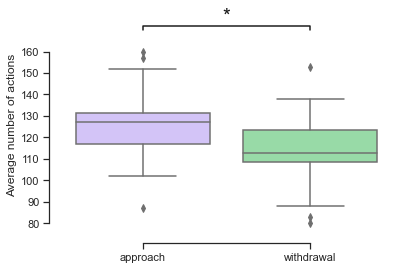

In [101]:
num_actions_df = pd.DataFrame({"approach": num_approach, 
                               "withdrawal": num_withdrawal, 
                               "inactive approach": num_inactive_approach,
                               "inactive withdrawal": num_inactive_withdrawal,
                               "punishments": num_punishments})

# sns.violinplot(data=num_actions_df[['approach', 'withdrawal']])
# sns.swarmplot(data=num_actions_df[['approach', 'withdrawal']], color="white", edgecolor="gray")

sns.set_theme(style="ticks", palette="pastel")
ax = sns.boxplot(data=num_actions_df[['approach', 'withdrawal']], palette=["m", "g"]).set(
#     xlabel='Actions', 
    ylabel='Average number of actions'
)
sns.despine(offset=10, trim=True)
# statistical annotation
x1, x2 = 0, 1   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = num_actions_df['approach'].max() + 10, 2, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col, fontsize=20)

In [102]:
stats.mannwhitneyu(num_actions_df['approach'], num_actions_df['withdrawal'], alternative='greater')

MannwhitneyuResult(statistic=597.0, pvalue=0.00039813212627777756)

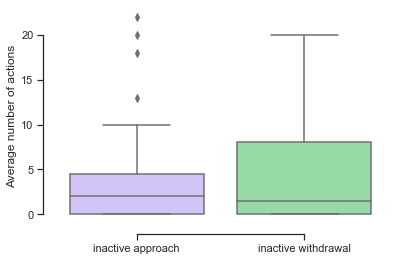

In [99]:
# sns.violinplot(data=num_actions_df[['inactive approach', 'inactive withdrawal']])
# sns.swarmplot(data=num_actions_df[['inactive approach', 'inactive withdrawal']], color="white", edgecolor="gray")

sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(data=num_actions_df[['inactive approach', 'inactive withdrawal']], palette=["m", "g"]).set(
#     xlabel='Incomplete actions', 
    ylabel='Average number of actions'
)
sns.despine(offset=10, trim=True)

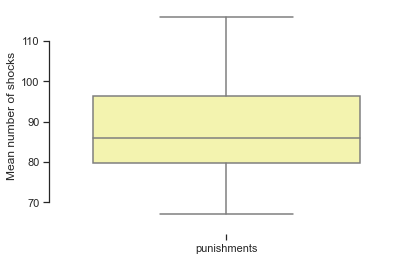

In [28]:
# sns.violinplot(data=num_actions_df[['punishments']])
# sns.swarmplot(data=num_actions_df[['punishments']], color="white", edgecolor="gray")

sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(data=num_actions_df[['punishments']], palette=["y"]).set(
#     xlabel='Actions', 
    ylabel='Mean number of shocks'
)
sns.despine(offset=10, trim=True)

In [29]:
firsthalf_withdrawal_bias_cue12_list

[-3.0,
 -2.0,
 2.0,
 3.0,
 10.0,
 -7.0,
 -5.0,
 -12.0,
 -3.0,
 4.0,
 6.0,
 2.0,
 10.0,
 1.0,
 -4.0,
 8.0,
 -6.0,
 -2.0,
 -11.0,
 -7.0,
 0.0,
 0.0,
 -6.0,
 -9.0,
 -14.0,
 -2.0,
 6.0,
 10.0]

In [30]:
secondhalf_withdrawal_bias_cue12_list

[1.0,
 0.0,
 -2.0,
 1.0,
 0.0,
 5.0,
 0.0,
 0.0,
 0.0,
 1.0,
 7.0,
 5.0,
 2.0,
 0.0,
 10.0,
 0.0,
 0.0,
 6.0,
 -3.0,
 -4.0,
 2.0,
 1.0,
 0.0,
 3.0,
 -13.0,
 -1.0,
 5.0,
 11.0]

In [31]:
sns.set_theme(style="ticks", palette="deep")

[Text(0, 0, 'First half'), Text(0, 0, 'Second half')]

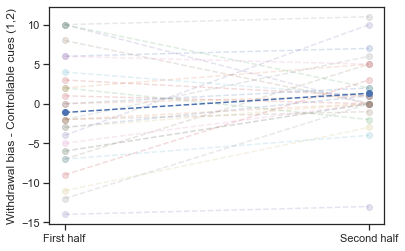

In [32]:
num_participants = len(secondhalf_withdrawal_bias_cue12_list)
for i in range(num_participants):
    plt.plot([0,1], [firsthalf_withdrawal_bias_cue12_list[i], secondhalf_withdrawal_bias_cue12_list[i]], 'o', linestyle="--", alpha=0.2)
    
plt.plot([0,1], [np.mean(firsthalf_withdrawal_bias_cue12_list), np.mean(secondhalf_withdrawal_bias_cue12_list)], 'bo', linestyle="--", alpha=1)
plt.ylabel('Withdrawal bias - Controllable cues (1,2)')
plt.xticks([0,1])
ax = plt.gca()
ax.set_xticklabels(['First half', 'Second half'])

[Text(0, 0, 'First half'), Text(0, 0, 'Second half')]

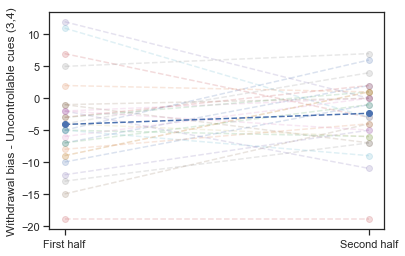

In [33]:
num_participants = len(secondhalf_withdrawal_bias_cue12_list)
for i in range(num_participants):
    plt.plot([0,1], [firsthalf_withdrawal_bias_cue34_list[i], secondhalf_withdrawal_bias_cue34_list[i]], 'o', linestyle="--", alpha=0.2)
    
plt.plot([0,1], [np.mean(firsthalf_withdrawal_bias_cue34_list), np.mean(secondhalf_withdrawal_bias_cue34_list)], 'bo', linestyle="--", alpha=1)
plt.ylabel('Withdrawal bias - Uncontrollable cues (3,4)')
plt.xticks([0,1])
ax = plt.gca()
ax.set_xticklabels(['First half', 'Second half'])

In [34]:
firsthalf_choice_bias_df = pd.DataFrame(list(zip(firsthalf_withdrawal_bias_cue12_list, firsthalf_withdrawal_bias_cue34_list)),
               columns =['Controllable cues \n(Cues 1 and 2)', 'Uncontrollable cues \n(Cues 3 and 4)'])
stats.mannwhitneyu(firsthalf_withdrawal_bias_cue12_list, firsthalf_withdrawal_bias_cue34_list, alternative='greater')

MannwhitneyuResult(statistic=492.5, pvalue=0.050379851488669185)

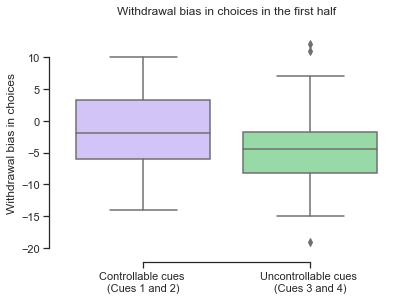

In [39]:
sns.set_theme(style="ticks", palette="pastel")
ax = sns.boxplot(data=firsthalf_choice_bias_df[['Controllable cues \n(Cues 1 and 2)', 'Uncontrollable cues \n(Cues 3 and 4)']], palette=["m", "g"]).set(
    ylabel='Withdrawal bias in choices'
)
sns.despine(offset=10, trim=True)
plt.title('Withdrawal bias in choices in the first half', pad=20)
# statistical annotation
x1, x2 = 0, 1  
y, h, col = firsthalf_choice_bias_df['Controllable cues \n(Cues 1 and 2)'].max()+1, 0.5, 'k'
# plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col, fontsize=20)


[Text(0, 0, 'Q1'), Text(0, 0, 'Q2'), Text(0, 0, 'Q3'), Text(0, 0, 'Q4')]

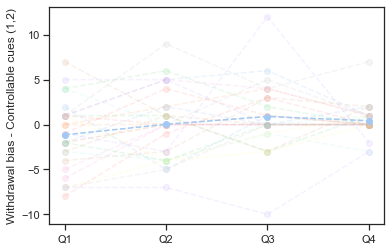

In [41]:
num_participants = len(secondhalf_withdrawal_bias_cue12_list)
for i in range(num_participants):
    plt.plot([0,1,2,3], [Q1_withdrawal_bias_cue12_list[i], Q2_withdrawal_bias_cue12_list[i], Q3_withdrawal_bias_cue12_list[i], Q4_withdrawal_bias_cue12_list[i]], 'o', linestyle="--", alpha=0.2)
    
plt.plot([0,1,2,3], [np.mean(Q1_withdrawal_bias_cue12_list), np.mean(Q2_withdrawal_bias_cue12_list), np.mean(Q3_withdrawal_bias_cue12_list), np.mean(Q4_withdrawal_bias_cue12_list)], 'bo', linestyle="--", alpha=1)
plt.ylabel('Withdrawal bias - Controllable cues (1,2)')
plt.xticks([0,1,2,3])
ax = plt.gca()
ax.set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])

[Text(0, 0, 'Q1'), Text(0, 0, 'Q2'), Text(0, 0, 'Q3'), Text(0, 0, 'Q4')]

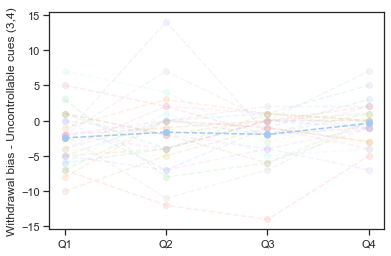

In [42]:
num_participants = len(secondhalf_withdrawal_bias_cue12_list)
for i in range(num_participants):
    plt.plot([0,1,2,3], [Q1_withdrawal_bias_cue34_list[i], Q2_withdrawal_bias_cue34_list[i], Q3_withdrawal_bias_cue34_list[i], Q4_withdrawal_bias_cue34_list[i]], 'o', linestyle="--", alpha=0.2)
    
plt.plot([0,1,2,3], [np.mean(Q1_withdrawal_bias_cue34_list), np.mean(Q2_withdrawal_bias_cue34_list), np.mean(Q3_withdrawal_bias_cue34_list), np.mean(Q4_withdrawal_bias_cue34_list)], 'bo', linestyle="--", alpha=1)
plt.ylabel('Withdrawal bias - Uncontrollable cues (3,4)')
plt.xticks([0,1,2,3])
ax = plt.gca()
ax.set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])

In [43]:
Q1_choice_bias_df = pd.DataFrame(list(zip(Q1_withdrawal_bias_cue12_list, Q1_withdrawal_bias_cue34_list)),
               columns =['Controllable cues \n(Cues 1 and 2)', 'Uncontrollable cues \n(Cues 3 and 4)'])
stats.mannwhitneyu(Q1_withdrawal_bias_cue12_list, Q1_withdrawal_bias_cue34_list, alternative='greater')

MannwhitneyuResult(statistic=475.5, pvalue=0.0856029068889651)

Text(0.5, 1.0, 'Withdrawal bias in choices in the first quarter (Q1)')

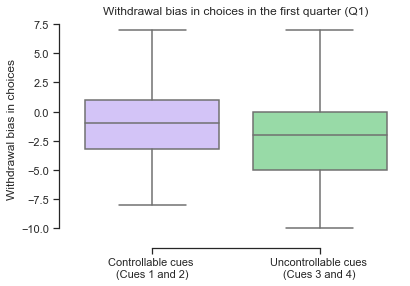

In [44]:
sns.set_theme(style="ticks", palette="pastel")
ax = sns.boxplot(data=Q1_choice_bias_df[['Controllable cues \n(Cues 1 and 2)', 'Uncontrollable cues \n(Cues 3 and 4)']], palette=["m", "g"]).set(
    ylabel='Withdrawal bias in choices'
)
sns.despine(offset=10, trim=True)
plt.title('Withdrawal bias in choices in the first quarter (Q1)')

In [48]:
Q2_choice_bias_df = pd.DataFrame(list(zip(Q2_withdrawal_bias_cue12_list, Q2_withdrawal_bias_cue34_list)),
               columns =['Controllable cues \n(Cues 1 and 2)', 'Uncontrollable cues \n(Cues 3 and 4)'])

stats.mannwhitneyu(Q2_withdrawal_bias_cue12_list, Q2_withdrawal_bias_cue34_list, alternative='greater')

MannwhitneyuResult(statistic=485.5, pvalue=0.062394428665937564)

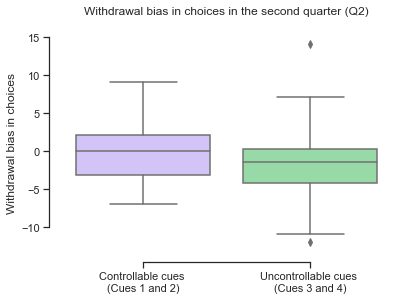

In [49]:
sns.set_theme(style="ticks", palette="pastel")
ax = sns.boxplot(data=Q2_choice_bias_df[['Controllable cues \n(Cues 1 and 2)', 'Uncontrollable cues \n(Cues 3 and 4)']], palette=["m", "g"]).set(
    ylabel='Withdrawal bias in choices'
)
sns.despine(offset=10, trim=True)
plt.title('Withdrawal bias in choices in the second quarter (Q2)', pad=20)
# statistical annotation
x1, x2 = 0, 1  
y, h, col = Q2_choice_bias_df['Controllable cues \n(Cues 1 and 2)'].max()+1, 0.5, 'k'
# plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col, fontsize=20)


In [57]:
# stats.ttest_ind(Q1_withdrawal_bias_cue12_list, Q1_withdrawal_bias_cue34_list, alternative='greater')
# stats.ttest_ind(Q2_withdrawal_bias_cue12_list, Q2_withdrawal_bias_cue34_list, alternative='greater')
# stats.ttest_ind(Q3_withdrawal_bias_cue12_list, Q3_withdrawal_bias_cue34_list, alternative='greater')
# stats.ttest_ind(Q4_withdrawal_bias_cue12_list, Q4_withdrawal_bias_cue34_list, alternative='greater')

In [56]:
# stats.mannwhitneyu(Q1_withdrawal_bias_cue12_list, Q1_withdrawal_bias_cue34_list, alternative='greater')
# stats.mannwhitneyu(Q2_withdrawal_bias_cue12_list, Q2_withdrawal_bias_cue34_list, alternative='greater')
# stats.mannwhitneyu(Q3_withdrawal_bias_cue12_list, Q3_withdrawal_bias_cue34_list, alternative='greater')
# stats.mannwhitneyu(Q4_withdrawal_bias_cue12_list, Q4_withdrawal_bias_cue34_list, alternative='greater')

In [58]:
Q2Q4_choice_bias_df = pd.DataFrame(list(zip(Q2_withdrawal_bias_cue12_list, Q4_withdrawal_bias_cue12_list)),
               columns =['Second quarter (Q2) \n(Cues 1 and 2)', 'Fourth quarter (Q4) \n(Cues 1 and 2)'])
stats.mannwhitneyu(Q2_withdrawal_bias_cue12_list, Q4_withdrawal_bias_cue12_list, alternative='greater')

MannwhitneyuResult(statistic=350.5, pvalue=0.7610860801343753)

Text(0.5, 1.0, 'Decrease in withdrawal bias with decrease in uncontrollability')

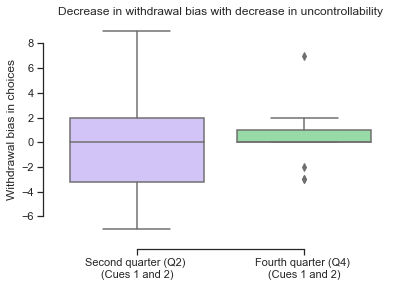

In [59]:
sns.set_theme(style="ticks", palette="pastel")
ax = sns.boxplot(data=Q2Q4_choice_bias_df[['Second quarter (Q2) \n(Cues 1 and 2)', 'Fourth quarter (Q4) \n(Cues 1 and 2)']], palette=["m", "g"]).set(
    ylabel='Withdrawal bias in choices'
)
sns.despine(offset=10, trim=True)
plt.title('Decrease in withdrawal bias with decrease in uncontrollability')

In [60]:
np.mean(Q2_withdrawal_bias_cue12_list), np.std(Q2_withdrawal_bias_cue12_list)

(0.03571428571428571, 3.7841978094735595)

In [61]:
np.mean(Q4_withdrawal_bias_cue12_list), np.std(Q4_withdrawal_bias_cue12_list)

(0.42857142857142855, 1.7408653724219914)

In [62]:
np.mean(Q2_withdrawal_bias_cue34_list), np.std(Q2_withdrawal_bias_cue34_list)

(-1.6428571428571428, 5.204491780556249)

[Text(0, 0, 'Q1'), Text(0, 0, 'Q2'), Text(0, 0, 'Q3'), Text(0, 0, 'Q4')]

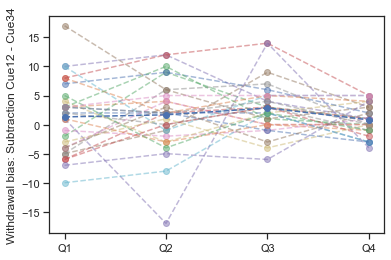

In [63]:
sns.set_theme(style="ticks", palette="deep")
for i in range(num_participants):
    plt.plot([0,1,2,3], [Q1_withdrawal_bias_cue12_list[i] - Q1_withdrawal_bias_cue34_list[i], Q2_withdrawal_bias_cue12_list[i] - Q2_withdrawal_bias_cue34_list[i], Q3_withdrawal_bias_cue12_list[i] - Q3_withdrawal_bias_cue34_list[i], Q4_withdrawal_bias_cue12_list[i] - Q4_withdrawal_bias_cue34_list[i]], 'o', linestyle="--", alpha=0.5)
    
plt.plot([0,1,2,3], [np.mean(Q1_withdrawal_bias_cue12_list) - np.mean(Q1_withdrawal_bias_cue34_list), np.mean(Q2_withdrawal_bias_cue12_list) - np.mean(Q2_withdrawal_bias_cue34_list), np.mean(Q3_withdrawal_bias_cue12_list) - np.mean(Q3_withdrawal_bias_cue34_list), np.mean(Q4_withdrawal_bias_cue12_list) - np.mean(Q4_withdrawal_bias_cue34_list)], 'bo', linestyle="--", alpha=1)
plt.ylabel('Withdrawal bias: Subtraction Cue12 - Cue34')
plt.xticks([0,1,2,3])
ax = plt.gca()
ax.set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])

In [64]:
stats.mannwhitneyu(np.array(Q2_withdrawal_bias_cue12_list) - np.array(Q2_withdrawal_bias_cue34_list), np.array(Q4_withdrawal_bias_cue12_list) - np.array(Q4_withdrawal_bias_cue34_list))
# stats.mannwhitneyu(np.array(Q3_withdrawal_bias_cue12_list) - np.array(Q3_withdrawal_bias_cue34_list), np.array(Q4_withdrawal_bias_cue12_list) - np.array(Q4_withdrawal_bias_cue34_list))


MannwhitneyuResult(statistic=446.5, pvalue=0.3742581434747092)

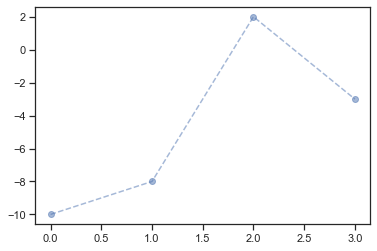

In [65]:
# Subtracted withdrawal bias
i=19
plt.plot([0,1,2,3], [Q1_withdrawal_bias_cue12_list[i] - Q1_withdrawal_bias_cue34_list[i], Q2_withdrawal_bias_cue12_list[i] - Q2_withdrawal_bias_cue34_list[i], Q3_withdrawal_bias_cue12_list[i] - Q3_withdrawal_bias_cue34_list[i], Q4_withdrawal_bias_cue12_list[i] - Q4_withdrawal_bias_cue34_list[i]], 'o', linestyle="--", alpha=0.5)

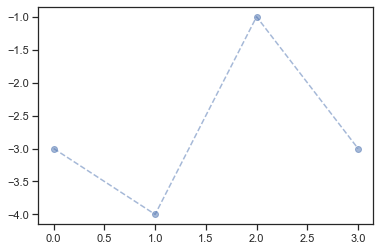

In [66]:
# Withdrawal bias cue12
i=19
plt.plot([0,1,2,3], [Q1_withdrawal_bias_cue12_list[i] , Q2_withdrawal_bias_cue12_list[i], Q3_withdrawal_bias_cue12_list[i], Q4_withdrawal_bias_cue12_list[i]], 'o', linestyle="--", alpha=0.5)  

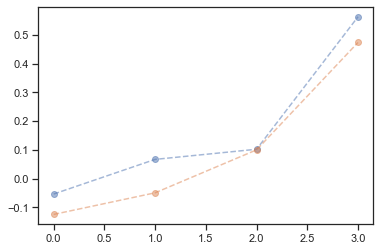

In [67]:
# Subtracted reaction time bias
i=19
plt.plot([0,1,2,3], [Q1_approach_times_list[i]-Q1_withdrawal_times_list[i], Q2_approach_times_list[i]-Q2_withdrawal_times_list[i], Q3_approach_times_list[i]-Q3_withdrawal_times_list[i], Q4_approach_times_list[i]-Q4_withdrawal_times_list[i]], 'o', linestyle="--", alpha=0.5)   
plt.plot([0,1,2,3], [Q1_approach_times_cue1_list[i]-Q1_withdrawal_times_cue2_list[i], Q2_approach_times_cue1_list[i]-Q2_withdrawal_times_cue2_list[i], Q3_approach_times_cue1_list[i]-Q3_withdrawal_times_cue2_list[i], Q4_approach_times_cue1_list[i]-Q4_withdrawal_times_cue2_list[i]], 'o', linestyle="--", alpha=0.5)

[Text(0, 0, 'First half'), Text(0, 0, 'Second half')]

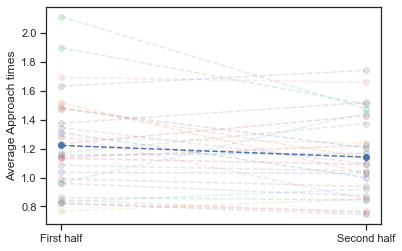

In [68]:
num_participants = len(secondhalf_withdrawal_bias_cue12_list)
for i in range(num_participants):
    plt.plot([0,1], [firsthalf_approach_times_list[i], secondhalf_approach_times_list[i]], 'o', linestyle="--", alpha=0.2)
    
plt.plot([0,1], [np.mean(firsthalf_approach_times_list), np.mean(secondhalf_approach_times_list)], 'bo', linestyle="--", alpha=1)
plt.ylabel('Average Approach times')
plt.xticks([0,1])
ax = plt.gca()
ax.set_xticklabels(['First half', 'Second half'])

[Text(0, 0, 'First half'), Text(0, 0, 'Second half')]

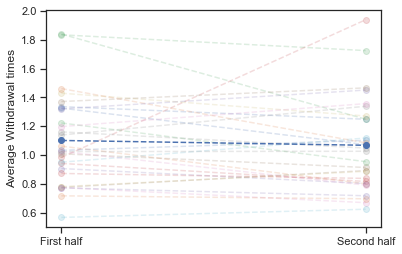

In [69]:
num_participants = len(secondhalf_withdrawal_bias_cue12_list)
for i in range(num_participants):
    plt.plot([0,1], [firsthalf_withdrawal_times_list[i], secondhalf_withdrawal_times_list[i]], 'o', linestyle="--", alpha=0.2)
    
plt.plot([0,1], [np.mean(firsthalf_withdrawal_times_list), np.mean(secondhalf_withdrawal_times_list)], 'bo', linestyle="--", alpha=1)
plt.ylabel('Average Withdrawal times')
plt.xticks([0,1])
ax = plt.gca()
ax.set_xticklabels(['First half', 'Second half'])

In [70]:
firsthalf_avg_rt_df = pd.DataFrame(list(zip(firsthalf_approach_times_list, firsthalf_withdrawal_times_list)),
               columns =['approach', 'withdrawal'])
stats.mannwhitneyu(firsthalf_approach_times_list, firsthalf_withdrawal_times_list, alternative='greater')

MannwhitneyuResult(statistic=475.0, pvalue=0.08820139083005868)

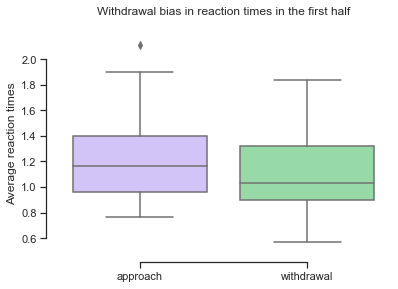

In [71]:
sns.set_theme(style="ticks", palette="pastel")
ax = sns.boxplot(data=firsthalf_avg_rt_df[['approach', 'withdrawal']], palette=["m", "g"]).set(
    ylabel='Average reaction times'
)
sns.despine(offset=10, trim=True)
plt.title('Withdrawal bias in reaction times in the first half', pad=20)
# statistical annotation
x1, x2 = 0, 1  
y, h, col = firsthalf_avg_rt_df['approach'].max()+0.1, 0.05, 'k'
# plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col, fontsize=20)

In [72]:
secondhalf_avg_rt_df = pd.DataFrame(list(zip(secondhalf_approach_times_list, secondhalf_withdrawal_times_list)),
               columns =['approach', 'withdrawal'])
stats.mannwhitneyu(secondhalf_approach_times_list, secondhalf_withdrawal_times_list, alternative='greater')

MannwhitneyuResult(statistic=459.0, pvalue=0.13791720825972964)

Text(0.5, 1.0, 'Withdrawal bias in reaction times in the second half')

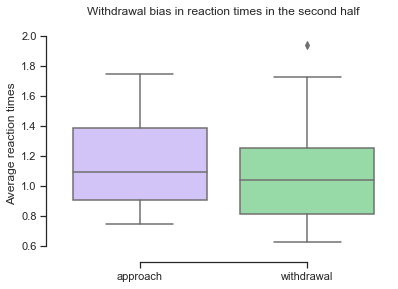

In [73]:
sns.set_theme(style="ticks", palette="pastel")
ax = sns.boxplot(data=secondhalf_avg_rt_df[['approach', 'withdrawal']], palette=["m", "g"]).set(
    ylabel='Average reaction times'
)
sns.despine(offset=10, trim=True)
plt.title('Withdrawal bias in reaction times in the second half', pad=20)

In [74]:
firsthalf_approach_times_list = np.array(firsthalf_approach_times_list)
firsthalf_withdrawal_times_list = np.array(firsthalf_withdrawal_times_list)
secondhalf_approach_times_list = np.array(secondhalf_approach_times_list)
secondhalf_withdrawal_times_list = np.array(secondhalf_withdrawal_times_list)

In [75]:
withdrawal_bias_rt_df = pd.DataFrame(list(zip(firsthalf_approach_times_list - firsthalf_withdrawal_times_list, secondhalf_approach_times_list - secondhalf_withdrawal_times_list)),
               columns =['First half', 'Second half'])
stats.mannwhitneyu(firsthalf_approach_times_list - firsthalf_withdrawal_times_list, secondhalf_approach_times_list - secondhalf_withdrawal_times_list, alternative='greater')

MannwhitneyuResult(statistic=446.0, pvalue=0.19032593341356424)

Text(0.5, 1.0, 'Decrease in withdrawal bias in reaction times with decrease in uncontrollability')

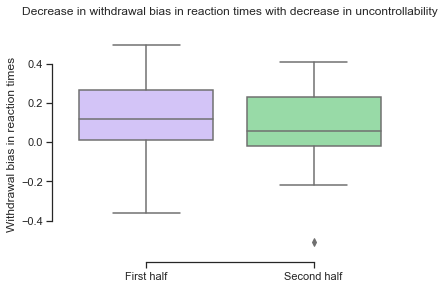

In [76]:
sns.set_theme(style="ticks", palette="pastel")
ax = sns.boxplot(data=withdrawal_bias_rt_df[['First half', 'Second half']], palette=["m", "g"]).set(
    ylabel='Withdrawal bias in reaction times'
)
sns.despine(offset=10, trim=True)
plt.title('Decrease in withdrawal bias in reaction times with decrease in uncontrollability', pad=20)

[Text(0, 0, 'Q1'), Text(0, 0, 'Q2'), Text(0, 0, 'Q3'), Text(0, 0, 'Q4')]

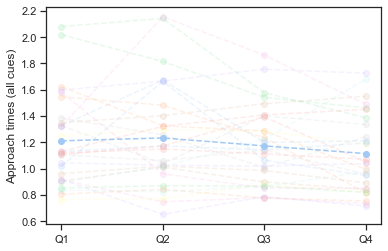

In [77]:
num_participants = len(secondhalf_withdrawal_bias_cue12_list)
for i in range(num_participants):
    plt.plot([0,1,2,3], [Q1_approach_times_list[i], Q2_approach_times_list[i], Q3_approach_times_list[i], Q4_approach_times_list[i]], 'o', linestyle="--", alpha=0.2)
    
plt.plot([0,1,2,3], [np.mean(Q1_approach_times_list), np.mean(Q2_approach_times_list), np.mean(Q3_approach_times_list), np.mean(Q4_approach_times_list)], 'bo', linestyle="--", alpha=1)
plt.ylabel('Approach times (all cues)')
plt.xticks([0,1,2,3])
ax = plt.gca()
ax.set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])

[Text(0, 0, 'Q1'), Text(0, 0, 'Q2'), Text(0, 0, 'Q3'), Text(0, 0, 'Q4')]

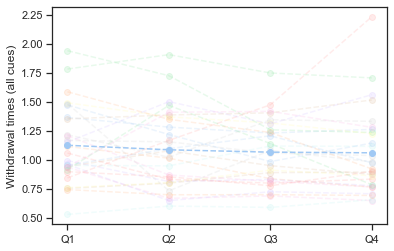

In [78]:
num_participants = len(secondhalf_withdrawal_bias_cue12_list)
for i in range(num_participants):
    plt.plot([0,1,2,3], [Q1_withdrawal_times_list[i], Q2_withdrawal_times_list[i], Q3_withdrawal_times_list[i], Q4_withdrawal_times_list[i]], 'o', linestyle="--", alpha=0.2)
    
plt.plot([0,1,2,3], [np.mean(Q1_withdrawal_times_list), np.mean(Q2_withdrawal_times_list), np.mean(Q3_withdrawal_times_list), np.mean(Q4_withdrawal_times_list)], 'bo', linestyle="--", alpha=1)
plt.ylabel('Withdrawal times (all cues)')
plt.xticks([0,1,2,3])
ax = plt.gca()
ax.set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])

In [79]:
Q1_avg_rt_df = pd.DataFrame(list(zip(Q1_approach_times_list, Q1_withdrawal_times_list)),
               columns =['approach', 'withdrawal'])
stats.mannwhitneyu(Q1_approach_times_list, Q1_withdrawal_times_list, alternative='greater')

MannwhitneyuResult(statistic=441.0, pvalue=0.21337608165490357)

Text(0.5, 1.0, 'Withdrawal bias in reaction times in the Q1')

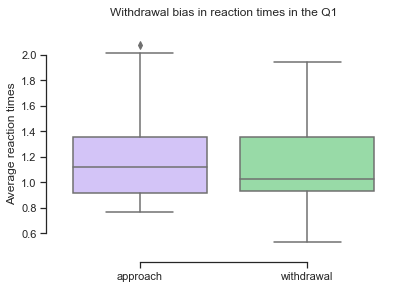

In [80]:
sns.set_theme(style="ticks", palette="pastel")
ax = sns.boxplot(data=Q1_avg_rt_df[['approach', 'withdrawal']], palette=["m", "g"]).set(
    ylabel='Average reaction times'
)
sns.despine(offset=10, trim=True)
plt.title('Withdrawal bias in reaction times in the Q1', pad=20)

In [81]:
Q2_avg_rt_df = pd.DataFrame(list(zip(Q2_approach_times_list, Q2_withdrawal_times_list)),
               columns =['approach', 'withdrawal'])
stats.mannwhitneyu(Q2_approach_times_list, Q2_withdrawal_times_list, alternative='greater')

MannwhitneyuResult(statistic=472.0, pvalue=0.09632944280942463)

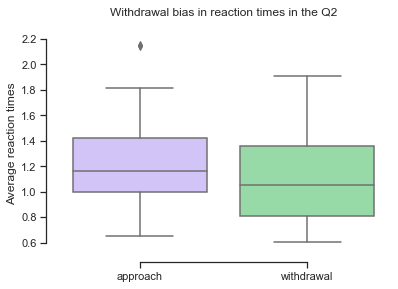

In [82]:
sns.set_theme(style="ticks", palette="pastel")
ax = sns.boxplot(data=Q2_avg_rt_df[['approach', 'withdrawal']], palette=["m", "g"]).set(
    ylabel='Average reaction times'
)
sns.despine(offset=10, trim=True)
plt.title('Withdrawal bias in reaction times in the Q2', pad=20)
# statistical annotation
x1, x2 = 0, 1  
y, h, col = Q2_avg_rt_df['approach'].max()+0.1, 0.05, 'k'
# plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col, fontsize=20)

In [83]:
# stats.mannwhitneyu(Q1_approach_times_list, Q1_withdrawal_times_list, alternative='greater')
# stats.mannwhitneyu(Q2_approach_times_list, Q2_withdrawal_times_list, alternative='greater')
# stats.mannwhitneyu(Q3_approach_times_list, Q3_withdrawal_times_list, alternative='greater')
# stats.mannwhitneyu(Q4_approach_times_list, Q4_withdrawal_times_list, alternative='greater')

In [84]:
np.mean(Q2_approach_times_list), np.std(Q2_approach_times_list)

(1.2335363793679288, 0.3903713629334145)

In [85]:
np.mean(Q2_withdrawal_times_list), np.std(Q2_withdrawal_times_list)

(1.086685444459463, 0.3343658648392791)

[Text(0, 0, 'Q1'), Text(0, 0, 'Q2'), Text(0, 0, 'Q3'), Text(0, 0, 'Q4')]

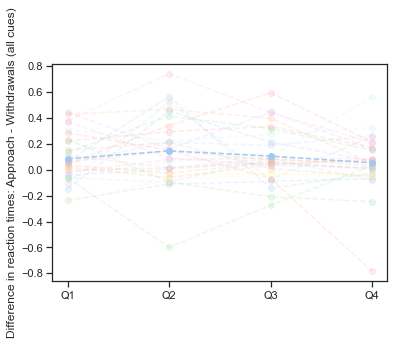

In [87]:
num_participants = len(secondhalf_withdrawal_bias_cue12_list)
for i in range(num_participants):
    plt.plot([0,1,2,3], [Q1_approach_times_list[i]-Q1_withdrawal_times_list[i], Q2_approach_times_list[i]-Q2_withdrawal_times_list[i], Q3_approach_times_list[i]-Q3_withdrawal_times_list[i], Q4_approach_times_list[i]-Q4_withdrawal_times_list[i]], 'o', linestyle="--", alpha=0.2)   
    
plt.plot([0,1,2,3], [np.mean(Q1_approach_times_list) - np.mean(Q1_withdrawal_times_list), np.mean(Q2_approach_times_list)-np.mean(Q2_withdrawal_times_list), np.mean(Q3_approach_times_list) -np.mean(Q3_withdrawal_times_list), np.mean(Q4_approach_times_list)-np.mean(Q4_withdrawal_times_list)], 'bo', linestyle="--", alpha=1)
plt.ylabel('Difference in reaction times: Approach - Withdrawals (all cues)')
plt.xticks([0,1,2,3])
ax = plt.gca()
ax.set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])

In [88]:
Q2Q4_withdrawal_bias_rt_df = pd.DataFrame(list(zip(np.array(Q2_approach_times_list) - np.array(Q2_withdrawal_times_list), np.array(Q4_approach_times_list) - np.array(Q4_withdrawal_times_list))),
               columns =['Second quarter (Q2) \n(All cues)', 'Fourth quarter (Q4) \n(All cues)'])
stats.mannwhitneyu(np.array(Q2_approach_times_list) - np.array(Q2_withdrawal_times_list), np.array(Q4_approach_times_list) - np.array(Q4_withdrawal_times_list), alternative='greater')


MannwhitneyuResult(statistic=456.0, pvalue=0.14903892182400286)

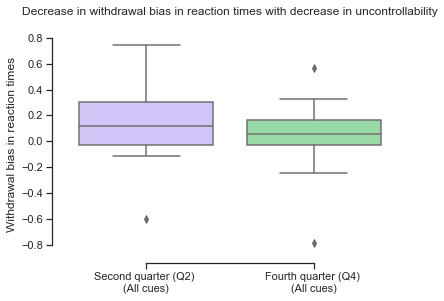

In [90]:
sns.set_theme(style="ticks", palette="pastel")
ax = sns.boxplot(data=Q2Q4_withdrawal_bias_rt_df[['Second quarter (Q2) \n(All cues)', 'Fourth quarter (Q4) \n(All cues)']], palette=["m", "g"]).set(
    ylabel='Withdrawal bias in reaction times'
)
sns.despine(offset=10, trim=True)
plt.title('Decrease in withdrawal bias in reaction times with decrease in uncontrollability', pad=20)
# statistical annotation
x1, x2 = 0, 1  
y, h, col = Q2Q4_withdrawal_bias_rt_df['Second quarter (Q2) \n(All cues)'].max()+0.1, 0.05, 'k'
# plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col, fontsize=20)

In [91]:
Q1Q2Q3Q4_withdrawal_bias_rt_df = pd.DataFrame(list(zip(np.array(Q1_approach_times_list) - np.array(Q1_withdrawal_times_list),\
                                                       np.array(Q2_approach_times_list) - np.array(Q2_withdrawal_times_list),\
                                                       np.array(Q3_approach_times_list) - np.array(Q3_withdrawal_times_list),\
                                                       np.array(Q4_approach_times_list) - np.array(Q4_withdrawal_times_list))),
               columns =['First quarter', 'Second quarter', 'Third quarter', 'Fourth quarter'])
stats.mannwhitneyu(np.array(Q2_approach_times_list) - np.array(Q2_withdrawal_times_list), np.array(Q4_approach_times_list) - np.array(Q4_withdrawal_times_list), alternative='greater')

MannwhitneyuResult(statistic=456.0, pvalue=0.14903892182400286)

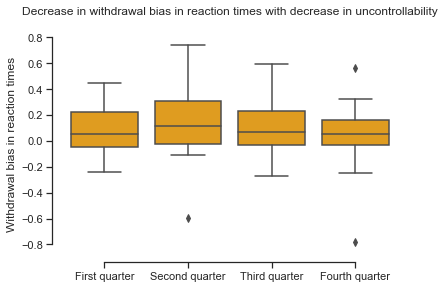

In [93]:
sns.set_theme(style="ticks", palette="pastel")
ax = sns.boxplot(data=Q1Q2Q3Q4_withdrawal_bias_rt_df[['First quarter', 'Second quarter', 'Third quarter', 'Fourth quarter']], palette=["orange"]).set(
    ylabel='Withdrawal bias in reaction times'
)
sns.despine(offset=10, trim=True)
plt.title('Decrease in withdrawal bias in reaction times with decrease in uncontrollability', pad=20)
# statistical annotation
x1, x2 = 1, 3  
y, h, col = Q2Q4_withdrawal_bias_rt_df['Second quarter (Q2) \n(All cues)'].max()+0.1, 0.05, 'k'
# plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col, fontsize=20)

In [641]:
stats.mannwhitneyu(np.array(Q2_approach_times_list) - np.array(Q2_withdrawal_times_list), np.array(Q4_approach_times_list) - np.array(Q4_withdrawal_times_list), alternative='greater')
# stats.mannwhitneyu(np.array(Q3_approach_times_list) - np.array(Q3_withdrawal_times_list), np.array(Q4_approach_times_list) - np.array(Q4_withdrawal_times_list), alternative='greater')

MannwhitneyuResult(statistic=288.0, pvalue=0.04595237716439967)

In [642]:
stats.mannwhitneyu(np.array(Q2_approach_times_list) - np.array(Q2_withdrawal_times_list), np.array(Q3_approach_times_list) - np.array(Q3_withdrawal_times_list), alternative='greater')

MannwhitneyuResult(statistic=271.0, pvalue=0.10423439756896485)

[Text(0, 0, 'Q1'), Text(1, 0, 'Q2'), Text(2, 0, 'Q3'), Text(3, 0, 'Q4')]

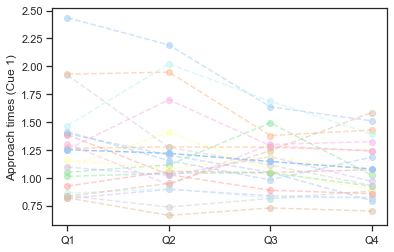

In [643]:
num_participants = len(secondhalf_withdrawal_bias_cue12_list)
for i in range(num_participants):
    plt.plot([0,1,2,3], [Q1_approach_times_cue1_list[i], Q2_approach_times_cue1_list[i], Q3_approach_times_cue1_list[i], Q4_approach_times_cue1_list[i]], 'o', linestyle="--", alpha=0.5)
    
plt.plot([0,1,2,3], [np.mean(Q1_approach_times_cue1_list), np.mean(Q2_approach_times_cue1_list), np.mean(Q3_approach_times_cue1_list), np.mean(Q4_approach_times_cue1_list)], 'bo', linestyle="--", alpha=1)
plt.ylabel('Approach times (Cue 1)')
plt.xticks([0,1,2,3])
ax = plt.gca()
ax.set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])

[Text(0, 0, 'Q1'), Text(1, 0, 'Q2'), Text(2, 0, 'Q3'), Text(3, 0, 'Q4')]

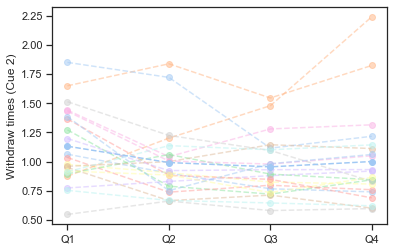

In [644]:
num_participants = len(secondhalf_withdrawal_bias_cue12_list)
for i in range(num_participants):
    plt.plot([0,1,2,3], [Q1_withdrawal_times_cue2_list[i], Q2_withdrawal_times_cue2_list[i], Q3_withdrawal_times_cue2_list[i], Q4_withdrawal_times_cue2_list[i]], 'o', linestyle="--", alpha=0.5)
    
plt.plot([0,1,2,3], [np.mean(Q1_withdrawal_times_cue2_list), np.mean(Q2_withdrawal_times_cue2_list), np.mean(Q3_withdrawal_times_cue2_list), np.mean(Q4_withdrawal_times_cue2_list)], 'bo', linestyle="--", alpha=1)
plt.ylabel('Withdraw times (Cue 2)')
plt.xticks([0,1,2,3])
ax = plt.gca()
ax.set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])

In [650]:
# stats.mannwhitneyu(Q1_approach_times_cue1_list, Q1_withdrawal_times_cue2_list, alternative='greater')
stats.mannwhitneyu(Q2_approach_times_cue1_list, Q2_withdrawal_times_cue2_list, alternative='greater')
# stats.mannwhitneyu(Q3_approach_times_cue1_list, Q3_withdrawal_times_cue2_list, alternative='greater')
# stats.mannwhitneyu(Q4_approach_times_cue1_list, Q4_withdrawal_times_cue2_list, alternative='greater')

MannwhitneyuResult(statistic=310.0, pvalue=0.012582484907974806)

[Text(0, 0, 'Q1'), Text(1, 0, 'Q2'), Text(2, 0, 'Q3'), Text(3, 0, 'Q4')]

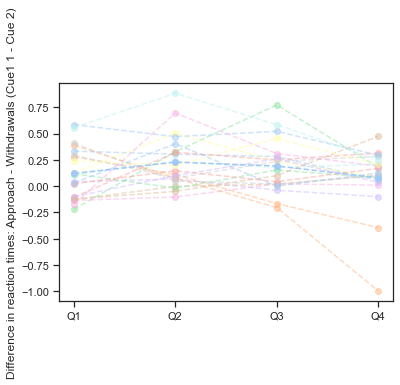

In [646]:
num_participants = len(secondhalf_withdrawal_bias_cue12_list)
for i in range(num_participants):
    plt.plot([0,1,2,3], [Q1_approach_times_cue1_list[i]-Q1_withdrawal_times_cue2_list[i], Q2_approach_times_cue1_list[i]-Q2_withdrawal_times_cue2_list[i], Q3_approach_times_cue1_list[i]-Q3_withdrawal_times_cue2_list[i], Q4_approach_times_cue1_list[i]-Q4_withdrawal_times_cue2_list[i]], 'o', linestyle="--", alpha=0.5)   
    
plt.plot([0,1,2,3], [np.mean(Q1_approach_times_cue1_list) - np.mean(Q1_withdrawal_times_cue2_list), np.mean(Q2_approach_times_cue1_list)-np.mean(Q2_withdrawal_times_cue2_list), np.mean(Q3_approach_times_cue1_list) -np.mean(Q3_withdrawal_times_cue2_list), np.mean(Q4_approach_times_cue1_list)-np.mean(Q4_withdrawal_times_cue2_list)], 'bo', linestyle="--", alpha=1)
plt.ylabel('Difference in reaction times: Approach - Withdrawals (Cue1 1 - Cue 2)')
plt.xticks([0,1,2,3])
ax = plt.gca()
ax.set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])

In [651]:
stats.mannwhitneyu(np.array(Q2_approach_times_cue1_list) - np.array(Q2_withdrawal_times_cue2_list), np.array(Q4_approach_times_cue1_list) - np.array(Q4_withdrawal_times_cue2_list), alternative='greater')
# stats.mannwhitneyu(np.array(Q3_approach_times_cue1_list) - np.array(Q3_withdrawal_times_cue2_list), np.array(Q4_approach_times_cue1_list) - np.array(Q4_withdrawal_times_cue2_list), alternative='greater')

MannwhitneyuResult(statistic=255.0, pvalue=0.19619388145837396)

[Text(0, 0, 'Q1'), Text(1, 0, 'Q2'), Text(2, 0, 'Q3'), Text(3, 0, 'Q4')]

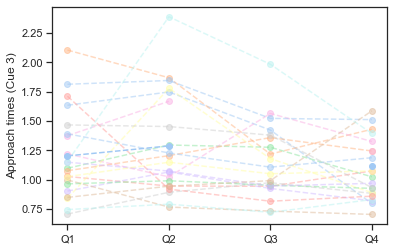

In [652]:
num_participants = len(secondhalf_withdrawal_bias_cue12_list)
for i in range(num_participants):
    plt.plot([0,1,2,3], [Q1_approach_times_cue3_list[i], Q2_approach_times_cue3_list[i], Q3_approach_times_cue3_list[i], Q4_approach_times_cue1_list[i]], 'o', linestyle="--", alpha=0.5)
    
plt.plot([0,1,2,3], [np.mean(Q1_approach_times_cue3_list), np.mean(Q2_approach_times_cue3_list), np.mean(Q3_approach_times_cue3_list), np.mean(Q4_approach_times_cue3_list)], 'bo', linestyle="--", alpha=1)
plt.ylabel('Approach times (Cue 3)')
plt.xticks([0,1,2,3])
ax = plt.gca()
ax.set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])

[Text(0, 0, 'Q1'), Text(1, 0, 'Q2'), Text(2, 0, 'Q3'), Text(3, 0, 'Q4')]

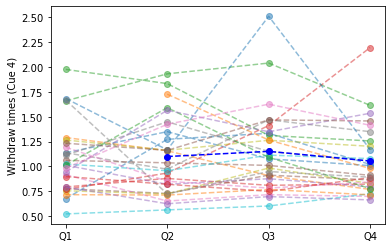

In [357]:
num_participants = len(secondhalf_withdrawal_bias_cue12_list)
for i in range(num_participants):
    plt.plot([0,1,2,3], [Q1_withdrawal_times_cue4_list[i], Q2_withdrawal_times_cue4_list[i], Q3_withdrawal_times_cue4_list[i], Q4_withdrawal_times_cue4_list[i]], 'o', linestyle="--", alpha=0.5)
    
plt.plot([0,1,2,3], [np.mean(Q1_withdrawal_times_cue4_list), np.mean(Q2_withdrawal_times_cue4_list), np.mean(Q3_withdrawal_times_cue4_list), np.mean(Q4_withdrawal_times_cue4_list)], 'bo', linestyle="--", alpha=1)
plt.ylabel('Withdraw times (Cue 4)')
plt.xticks([0,1,2,3])
ax = plt.gca()
ax.set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])

In [243]:
# PLAYING AROUND

In [213]:
subj_num = 8
subj_str = str(subj_num).zfill(2)
try:
    behavioural_df = pd.read_csv('FishTaskPilotData/Data/subj'+subj_str+'/SUBJ'+subj_str+'_Right.csv')
except:
    behavioural_df = pd.read_csv('FishTaskPilotData/Data/subj'+subj_str+'/SUBJ'+subj_str+'_Left.csv')

In [362]:
# behavioural_df = pd.read_csv('FishTaskPilotData/Data/subj01/SUBJ01_Right.csv')
full_seq_df = pd.read_csv('full_seq.csv')
behavioural_df = behavioural_df.join(full_seq_df)

In [363]:
mapping = {'approach': 1, 'withdrawal': 0, 'inactive_approach': 1, 'inactive_withdrawal': 0}
action_int = behavioural_df['Action'].replace(mapping)

punishments = action_int*behavioural_df['resultGo'] + (1-action_int)*behavioural_df['resultNoGo']
sum(punishments)

85.0

In [364]:
np.sum(behavioural_df['Action'] == 'approach')

130

In [365]:
np.sum(behavioural_df['Action'] == 'withdrawal')

110

In [366]:
np.sum(behavioural_df['Action'] == 'inactive')

0

In [367]:
np.sum(behavioural_df['Action'] == 'inactive_approach')

0

In [368]:
np.sum(behavioural_df['Action'] == 'inactive_withdrawal')

0

In [369]:
# behavioural_df.loc[behavioural_df['cue4']==1][45:60]
behavioural_df

,Trial,Action,ReactionTime,TrialStartTime,TrialEndTime,ShockGiven,cue1,cue2,cue3,cue4,resultGo,resultNoGo
0,2,approach,1.022081,86.48729,91.28538,False,0.0,0.0,1.0,0.0,0.0,1.0
1,3,withdrawal,0.899804,93.31796,97.99366,True,0.0,0.0,0.0,1.0,0.0,1.0
2,4,approach,1.155380,98.44865,103.37980,True,0.0,0.0,0.0,1.0,1.0,0.0
3,5,approach,1.044539,103.39090,108.21090,True,0.0,1.0,0.0,0.0,1.0,0.0
4,6,withdrawal,0.488349,108.22210,112.48690,False,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
235,237,withdrawal,0.755143,1337.10500,1341.63500,False,0.0,1.0,0.0,0.0,1.0,0.0
236,238,approach,0.710653,1341.95700,1346.44400,False,1.0,0.0,0.0,0.0,0.0,1.0
237,239,withdrawal,0.833159,1346.88800,1351.49600,False,0.0,1.0,0.0,0.0,1.0,0.0
238,240,withdrawal,0.788590,1351.90700,1356.47000,False,0.0,0.0,0.0,1.0,1.0,0.0


In [374]:
# Baseline:
sum(behavioural_df['resultGo']), sum(behavioural_df['resultNoGo'])

(122.0, 118.0)

In [375]:
behavioural_Q1df = behavioural_df[:60]
behavioural_Q2df = behavioural_df[60:120]
behavioural_Q3df = behavioural_df[120:180]
behavioural_Q4df = behavioural_df[180:]
behavioural_Q1Q2df = behavioural_df[:120]
behavioural_Q3Q4df = behavioural_df[120:]

# Quarter-wise aggregates

In [376]:
np.sum(behavioural_Q1df['Action'] == 'approach'), np.sum(behavioural_Q1df['Action'] == 'withdrawal')

(33, 27)

In [377]:
np.sum(behavioural_Q2df['Action'] == 'approach'), np.sum(behavioural_Q2df['Action'] == 'withdrawal')

(35, 25)

In [378]:
np.sum(behavioural_Q3df['Action'] == 'approach'), np.sum(behavioural_Q3df['Action'] == 'withdrawal')

(33, 27)

In [379]:
np.sum(behavioural_Q4df['Action'] == 'approach'), np.sum(behavioural_Q4df['Action'] == 'withdrawal')

(29, 31)

In [380]:
np.mean(behavioural_Q1df['ReactionTime']), np.std(behavioural_Q1df['ReactionTime'])

(0.8368501933333333, 0.17428944490014675)

In [381]:
np.mean(behavioural_Q2df['ReactionTime']), np.std(behavioural_Q2df['ReactionTime'])

(0.9227888916666667, 0.1964177779466303)

In [382]:
np.mean(behavioural_Q3df['ReactionTime']), np.std(behavioural_Q3df['ReactionTime'])

(0.8948581783333335, 0.14940391753625817)

In [383]:
np.mean(behavioural_Q4df['ReactionTime']), np.std(behavioural_Q4df['ReactionTime'])

(0.8700964333333333, 0.17283101232019352)

# Choice Dot Plots

In [384]:
mapping = {'approach': 1, 'withdrawal': 0, 'inactive_approach': 1, 'inactive_withdrawal':0}

cue1_choices = np.array(behavioural_df.loc[behavioural_df['cue1']==1]['Action'].replace(mapping))
cue2_choices = np.array(behavioural_df.loc[behavioural_df['cue2']==1]['Action'].replace(mapping))
cue3_choices = np.array(behavioural_df.loc[behavioural_df['cue3']==1]['Action'].replace(mapping))
cue4_choices = np.array(behavioural_df.loc[behavioural_df['cue4']==1]['Action'].replace(mapping))

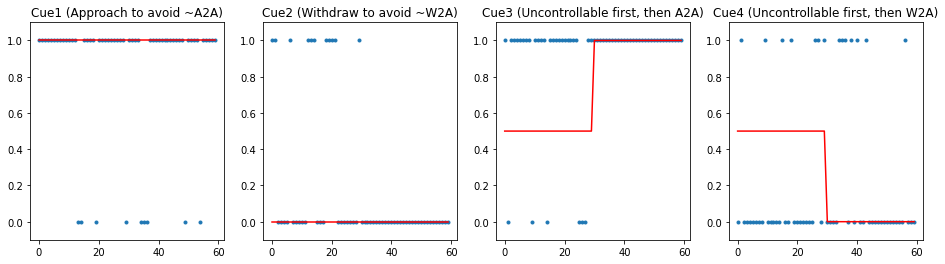

In [385]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(16,4))
ax1.plot(cue1_choices, '.')
true_value = np.ones(60)
ax1.plot(true_value, 'r')
ax1.set_ylim([-0.1, 1.1])

ax2.plot(cue2_choices, '.')
true_value = np.zeros(60)
ax2.plot(true_value, 'r')
ax2.set_ylim([-0.1, 1.1])

ax3.plot(cue3_choices, '.')
true_value = np.concatenate([0.5*np.ones(30), np.ones(30)])
ax3.plot(true_value, 'r')
ax3.set_ylim([-0.1, 1.1])

ax4.plot(cue4_choices, '.')
true_value = np.concatenate([0.5*np.ones(30), np.zeros(30)])
ax4.plot(true_value, 'r')
ax4.set_ylim([-0.1, 1.1])

ax1.title.set_text('Cue1 (Approach to avoid ~A2A)')
ax2.title.set_text('Cue2 (Withdraw to avoid ~W2A)')
ax3.title.set_text('Cue3 (Uncontrollable first, then A2A)')
ax4.title.set_text('Cue4 (Uncontrollable first, then W2A)')
plt.show()

# Withdrawal Bias estimation from choices

In [359]:
def get_withdrawal_bias_cue12(subset_df):
    window_len = len(subset_df)
    cue1_choices = np.array(subset_df.loc[subset_df['cue1']==1]['Action'].replace(mapping))
    cue2_choices = np.array(subset_df.loc[subset_df['cue2']==1]['Action'].replace(mapping))
    
    # Approach in cue 1 is accurate
    # Withdrawal in cue 2 is accurate
    
    # Withdrawal bias is correct actions in cue2 minus correct actions in cue1
    
    # print("Withdrawal in Cue 2:", (sum(cue2_choices==0)))
    # print("Approach in Cue 1:", sum(cue1_choices))
    
    withdrawal_bias_cue = (sum(cue2_choices==0) - sum(cue1_choices))/window_len
    return withdrawal_bias_cue

def get_withdrawal_bias_cue34(subset_df):
    window_len = len(subset_df)
    cue3_choices = np.array(subset_df.loc[subset_df['cue3']==1]['Action'].replace(mapping))
    cue4_choices = np.array(subset_df.loc[subset_df['cue4']==1]['Action'].replace(mapping))
    
    # Approach in cue 3 is accurate in second half
    # Withdrawal in cue 4 is accurate in second half
    
    # Withdrawal bias in first half is withdrawals more than number of approaches for both cue3 and cue4
    # Withdrawal bias in second half is correct actions in cue4 minus correct actions in cue3
    
    withdrawal_bias_uncontrollablecue3 = (sum(cue3_choices==0) - sum(cue3_choices))/window_len
    withdrawal_bias_uncontrollablecue4 = (sum(cue4_choices==0) - sum(cue4_choices))/window_len
    withdrawal_bias_controllable = ((sum(cue4_choices==0)) - sum(cue3_choices))/window_len
    return withdrawal_bias_uncontrollablecue3, withdrawal_bias_uncontrollablecue4, withdrawal_bias_controllable

In [360]:
get_withdrawal_bias_cue12(behavioural_Q1Q2df), get_withdrawal_bias_cue12(behavioural_Q3Q4df)

(0.08333333333333333, 0.0)

In [329]:
get_withdrawal_bias_cue12(behavioural_Q1df), get_withdrawal_bias_cue12(behavioural_Q2df), \
get_withdrawal_bias_cue12(behavioural_Q3df), get_withdrawal_bias_cue12(behavioural_Q4df)

(-0.03333333333333333, 0.0, 0.0, 0.0)

In [330]:
get_withdrawal_bias_cue34(behavioural_Q1Q2df), get_withdrawal_bias_cue34(behavioural_Q3Q4df)
# 0.125), (-0.1, 0.15 are meaningless, rest is good

((-0.16666666666666666, 0.016666666666666666, -0.075),
 (-0.23333333333333334, 0.25, 0.008333333333333333))

# Reaction Times

In [331]:
def get_all_reactiontimes(subset_df):
    window_len = len(subset_df)
    cue1_choices_reaction_times = subset_df.loc[subset_df['cue1']==1][['Action', 'ReactionTime']].replace(mapping)
    cue2_choices_reaction_times = subset_df.loc[subset_df['cue2']==1][['Action', 'ReactionTime']].replace(mapping)
    cue3_choices_reaction_times = subset_df.loc[subset_df['cue3']==1][['Action', 'ReactionTime']].replace(mapping)
    cue4_choices_reaction_times = subset_df.loc[subset_df['cue4']==1][['Action', 'ReactionTime']].replace(mapping)
    
    print("%.2f %.2f %.2f %.2f" % (np.mean(cue1_choices_reaction_times['ReactionTime']), np.mean(cue2_choices_reaction_times['ReactionTime']),\
         np.mean(cue3_choices_reaction_times['ReactionTime']), np.mean(cue4_choices_reaction_times['ReactionTime'])))

In [332]:
print("cue1 cue2 cue3 cue4")
get_all_reactiontimes(behavioural_Q1df)
get_all_reactiontimes(behavioural_Q2df)
get_all_reactiontimes(behavioural_Q3df)
get_all_reactiontimes(behavioural_Q4df)

cue1 cue2 cue3 cue4
1.40 1.13 1.47 1.53
1.20 0.90 1.72 1.30
1.05 0.77 1.42 0.91
0.80 0.74 0.85 0.77


In [333]:
def get_all_approach_withdrawal_times(subset_df):
    window_len = len(subset_df)
    subset_df = subset_df.replace(mapping)
    approach_reaction_times = subset_df.loc[subset_df['Action']==1]['ReactionTime']
    withdrawal_choices_reaction_times = subset_df.loc[subset_df['Action']==0]['ReactionTime']
    
    print("%.2f %.2f" % (np.mean(approach_reaction_times), np.mean(withdrawal_choices_reaction_times)))
   

In [334]:
print("Appr Withd")
get_all_approach_withdrawal_times(behavioural_Q1df)
get_all_approach_withdrawal_times(behavioural_Q2df)
get_all_approach_withdrawal_times(behavioural_Q3df)
get_all_approach_withdrawal_times(behavioural_Q4df)

Appr Withd
1.55 1.12
1.48 1.01
1.24 0.84
0.82 0.76


In [335]:
def get_cuewise_approach_reactiontimes(subset_df):
    window_len = len(subset_df)
    cue1_choices_reaction_times = subset_df.loc[subset_df['cue1']==1][['Action', 'ReactionTime']].replace(mapping)
    cue2_choices_reaction_times = subset_df.loc[subset_df['cue2']==1][['Action', 'ReactionTime']].replace(mapping)
    cue3_choices_reaction_times = subset_df.loc[subset_df['cue3']==1][['Action', 'ReactionTime']].replace(mapping)
    cue4_choices_reaction_times = subset_df.loc[subset_df['cue4']==1][['Action', 'ReactionTime']].replace(mapping)
    
    cue1_approach_times = cue1_choices_reaction_times.loc[cue1_choices_reaction_times['Action']==1]['ReactionTime']
    cue2_approach_times = cue2_choices_reaction_times.loc[cue2_choices_reaction_times['Action']==1]['ReactionTime']
    cue3_approach_times = cue3_choices_reaction_times.loc[cue3_choices_reaction_times['Action']==1]['ReactionTime']
    cue4_approach_times = cue4_choices_reaction_times.loc[cue4_choices_reaction_times['Action']==1]['ReactionTime']
    
    print("%.2f %.2f %.2f %.2f" % (np.mean(cue1_approach_times), np.mean(cue2_approach_times),\
         np.mean(cue3_approach_times), np.mean(cue4_approach_times)))


def get_cuewise_withdrawal_reactiontimes(subset_df):
    window_len = len(subset_df)
    cue1_choices_reaction_times = subset_df.loc[subset_df['cue1']==1][['Action', 'ReactionTime']].replace(mapping)
    cue2_choices_reaction_times = subset_df.loc[subset_df['cue2']==1][['Action', 'ReactionTime']].replace(mapping)
    cue3_choices_reaction_times = subset_df.loc[subset_df['cue3']==1][['Action', 'ReactionTime']].replace(mapping)
    cue4_choices_reaction_times = subset_df.loc[subset_df['cue4']==1][['Action', 'ReactionTime']].replace(mapping)
    
    cue1_withdrawal_times = cue1_choices_reaction_times.loc[cue1_choices_reaction_times['Action']==0]['ReactionTime']
    cue2_withdrawal_times = cue2_choices_reaction_times.loc[cue2_choices_reaction_times['Action']==0]['ReactionTime']
    cue3_withdrawal_times = cue3_choices_reaction_times.loc[cue3_choices_reaction_times['Action']==0]['ReactionTime']
    cue4_withdrawal_times = cue4_choices_reaction_times.loc[cue4_choices_reaction_times['Action']==0]['ReactionTime']
    
    print("%.2f %.2f %.2f %.2f" % (np.mean(cue1_withdrawal_times), np.mean(cue2_withdrawal_times),\
         np.mean(cue3_withdrawal_times), np.mean(cue4_withdrawal_times)))

In [336]:
print("Approach times")
print("cue1 cue2 cue3 cue4")
get_cuewise_approach_reactiontimes(behavioural_Q1df)
get_cuewise_approach_reactiontimes(behavioural_Q2df)
get_cuewise_approach_reactiontimes(behavioural_Q3df)
get_cuewise_approach_reactiontimes(behavioural_Q4df)

# see cue 1 approach time increasing in Q2

Approach times
cue1 cue2 cue3 cue4
1.40 1.57 1.63 1.68
1.20 nan 1.75 1.57
1.05 nan 1.42 nan
0.80 nan 0.84 nan


In [337]:
print("Withdrawal times")
print("cue1 cue2 cue3 cue4")
get_cuewise_withdrawal_reactiontimes(behavioural_Q1df)
get_cuewise_withdrawal_reactiontimes(behavioural_Q2df)
get_cuewise_withdrawal_reactiontimes(behavioural_Q3df)
get_cuewise_withdrawal_reactiontimes(behavioural_Q4df)
# all withdrawal times reduce 

Withdrawal times
cue1 cue2 cue3 cue4
nan 1.06 1.02 1.29
nan 0.90 1.28 1.16
nan 0.77 nan 0.91
nan 0.74 1.07 0.77


# Logged data

In [103]:
from datetime import datetime, date

In [104]:
ls FishTaskPilotData/Data/subj07

SUBJ07_Right.csv*
test__Control_Data__.json*
test__Device_Data_Digitimer_DS5_NI_USB_6202__.json*
test__Device_Data_LiveAmp_LSL_Compatible_Univ__.json*
test__Device_Data_Unity_C_Sharp_Client_VR__.json*
test__Device_Descriptors__.json*


In [105]:
js1 = pd.read_json('FishTaskPilotData/Data/subj07/test__Device_Data_LiveAmp_LSL_Compatible_Univ__.json')
js2 = pd.read_json('FishTaskPilotData/Data/subj07/test__Device_Data_Unity_C_Sharp_Client_VR__.json')

In [106]:
js1

,Ch1,Ch2,Ch3,Ch4,Ch5,Ch6,Ch7,Ch8,Ch9,Ch10,...,Ch33,Ch34,Ch35,Ch36,Ch37,Ch38,Ch39,Ch40,last_trigger_on_client,timestamp
0,"[-322731.4, -322739.75, -322757.938, -322757.6...","[5702.18945, 5703.532, 5706.299, 5706.62451, 5...","[-323070.844, -323078.9, -323097.469, -323097....","[-323116.438, -323124.656, -323143.031, -32314...","[-323011.938, -323020, -323038.344, -323038.06...","[-323094.125, -323102.219, -323120.625, -32312...","[3819.49878, 3819.21387, 3819.17334, 3819.0105...","[1632.60913, 1634.48083, 1634.074, 1634.0332, ...","[-10482.5039, -10480.917, -10480.4287, -10480....","[-21.6471367, -21.1995449, -21.5250664, -21.24...",...,"[15123.3672, 15116.93, 15116.93, 15104.0557, 1...","[2157711.75, 2159424, 2161178, 2162851.75, 216...","[-257850.4, -256010.4, -255123.141, -261040.1,...","[-121, -121, -120, -120, -117, -117, -117, -11...","[1011, 1011, 1012, 1012, 1015, 1015, 1015, 101...","[-8, -8, -8, -8, -8, -8, -8, -8, -8, -8, -9, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...",-1,2022-09-06 14:57:29.701
1,"[-322727.219, -322742.3, -322759.3, -322760.34...","[5708.374, 5707.56055, 5707.235, 5709.63574, 5...","[-323066.375, -323081.344, -323099.156, -32309...","[-323111.9, -323127.281, -323144.781, -323145....","[-323007.75, -323022.75, -323039.875, -323040....","[-323089.625, -323104.625, -323121.781, -32312...","[3818.156, 3820.272, 3820.92285, 3822.55054, 3...","[1628.8656, 1630.90015, 1631.10352, 1634.0332,...","[-10492.31, -10493.042, -10491.5771, -10490.19...","[-38.45215, -36.0514336, -34.87142, -32.104492...",...,"[15124.44, 15122.2939, 15118.0029, 15125.5127,...","[2187056, 2187416.5, 2187610.75, 2187624.75, 2...","[-258081.078, -255008.344, -254920.359, -26074...","[-120, -121, -121, -121, -119, -119, -121, -12...","[1011, 1011, 1011, 1011, 1012, 1012, 1016, 101...","[-8, -9, -9, -9, -8, -8, -8, -8, -8, -9, -9, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...",-1,2022-09-06 14:57:29.729
2,"[-322725.063, -322735.4, -322756.938, -322759....","[5707.845, 5707.235, 5710.205, 5707.43848, 570...","[-323063.4, -323073.656, -323095.719, -323098....","[-323109.219, -323119.4, -323141.4, -323144.5,...","[-323005.219, -323015.719, -323037.2, -323040....","[-323087.656, -323097.938, -323119.438, -32312...","[3821.94019, 3819.0105, 3820.76025, 3820.02783...","[1630.37109, 1629.476, 1632.28357, 1633.74841,...","[-10489.8682, -10489.7061, -10487.0605, -10487...","[-31.20931, -29.5410156, -24.8616543, -25.5126...",...,"[15118.0029, 15128.7314, 15113.7109, 15108.346...","[2173283.5, 2171533.5, 2169548.75, 2167434, 21...","[-258679.75, -256375.188, -254706.859, -260038...","[-121, -121, -121, -125, -125, -125, -122, -12...","[1011, 1011, 1011, 1011, 1011, 1011, 1014, 101...","[-9, -9, -9, -8, -8, -8, -9, -9, -10, -10, -10...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...",-1,2022-09-06 14:57:29.771
3,"[-322725.875, -322743.938, -322757.875, -32275...","[5701.294, 5706.218, 5705.56641, 5706.462, 570...","[-323065.875, -323083.344, -323097.2, -323097....","[-323111.625, -323129.125, -323142.969, -32314...","[-323006.344, -323024.125, -323037.969, -32303...","[-323088.6, -323106.375, -323120.281, -323120....","[3818.9292, 3819.458, 3819.53955, 3819.41748, ...","[1630.57458, 1632.93457, 1632.69043, 1633.0974...","[-10494.751, -10495.6465, -10491.74, -10493.93...","[-37.88249, -35.64453, -33.2845078, -33.162437...",...,"[15126.5859, 15119.0762, 15116.93, 15100.8369,...","[2133970.75, 2131870.25, 2129698.75, 2127568, ...","[-259023.078, -255221.844, -254150.031, -25832...","[-122, -122, -121, -121, -121, -121, -121, -12...","[1014, 1014, 1014, 1014, 1014, 1012, 1012, 101...","[-8, -8, -8, -8, -8, -9, -9, -9, -8, -8, -8, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...",-1,2022-09-06 14:57:29.811
4,"[-

In [107]:
js2['right_elbow_position'][150000]

[1.033966660499572, 1.049599409103393, 13.708961486816406]

In [108]:
js2['right_shoulder_position']

0                                              [2.5, 0, 13]
1                                              [2.5, 0, 13]
2                                              [2.5, 0, 13]
3         [1.17929196357727, 1.399827122688293, 12.86700...
4         [1.179176926612854, 1.399843335151672, 12.8669...
                                ...                        
175581    [1.176608085632324, 1.402095437049865, 13.8533...
175582    [1.1768295764923091, 1.402028799057006, 13.853...
175583    [1.177016735076904, 1.402048826217651, 13.8535...
175584    [1.177077293395996, 1.402090668678283, 13.8535...
175585    [1.177263617515564, 1.402130007743835, 13.8535...
Name: right_shoulder_position, Length: 175586, dtype: object

In [109]:
js2['left_shoulder_position']

0         [2.5, 0, 13]
1         [2.5, 0, 13]
2         [2.5, 0, 13]
3         [2.5, 0, 13]
4         [2.5, 0, 13]
              ...     
175581    [2.5, 0, 14]
175582    [2.5, 0, 14]
175583    [2.5, 0, 14]
175584    [2.5, 0, 14]
175585    [2.5, 0, 14]
Name: left_shoulder_position, Length: 175586, dtype: object

In [99]:
js2.columns

Index(['left_hand_position', 'left_hand_rotation', 'right_hand_position',
       'right_hand_rotation', 'head_position', 'head_rotation',
       'left_elbow_position', 'left_elbow_rotation', 'right_elbow_position',
       'right_elbow_rotation', 'left_shoulder_position',
       'left_shoulder_rotation', 'right_shoulder_position',
       'right_shoulder_rotation', 'chest_position', 'chest_rotation',
       'pickable_object_attached', 'pickable_object', 'board_command',
       'user_action', 'slider_bar_value', 'gaze_object', 'gaze_direction',
       'left_pupil_diameter_mm', 'right_pupil_diameter_mm',
       'left_eye_openness', 'right_eye_openness', 'left_pupil_position',
       'right_pupil_position', 'touchedFish', 'giveShock', 'trialStarted',
       'stimuliShown', 'neutralOutcome', 'trialEnded', 'interjectInstruction',
       'interjectedInstructionText', 'currentscene', 'trialnum', 'action',
       'reactiontime', 'trialstarttime', 'trialendtime', 'trialphase',
       'fruits_posi

In [111]:
js1['timestamp'][26250:26300]
# 2022-08-07 12:55:11.527

26250   2022-09-06 15:14:59.733
26251   2022-09-06 15:14:59.761
26252   2022-09-06 15:14:59.803
26253   2022-09-06 15:14:59.853
26254   2022-09-06 15:14:59.909
26255   2022-09-06 15:14:59.946
26256   2022-09-06 15:14:59.976
26257   2022-09-06 15:15:00.018
26258   2022-09-06 15:15:00.060
26259   2022-09-06 15:15:00.100
26260   2022-09-06 15:15:00.126
26261   2022-09-06 15:15:00.170
26262   2022-09-06 15:15:00.216
26263   2022-09-06 15:15:00.282
26264   2022-09-06 15:15:00.318
26265   2022-09-06 15:15:00.347
26266   2022-09-06 15:15:00.367
26267   2022-09-06 15:15:00.405
26268   2022-09-06 15:15:00.447
26269   2022-09-06 15:15:00.487
26270   2022-09-06 15:15:00.529
26271   2022-09-06 15:15:00.571
26272   2022-09-06 15:15:00.609
26273   2022-09-06 15:15:00.688
26274   2022-09-06 15:15:00.710
26275   2022-09-06 15:15:00.730
26276   2022-09-06 15:15:00.768
26277   2022-09-06 15:15:00.808
26278   2022-09-06 15:15:00.862
26279   2022-09-06 15:15:00.898
26280   2022-09-06 15:15:00.936
26281   

In [112]:
len(js1['Ch1'][2])

20

In [113]:
js2['timestamp']

0        2022-09-06 15:04:13.618
1        2022-09-06 15:04:13.630
2        2022-09-06 15:04:13.636
3        2022-09-06 15:04:13.644
4        2022-09-06 15:04:13.652
                   ...          
175581   2022-09-06 15:36:46.442
175582   2022-09-06 15:36:46.453
175583   2022-09-06 15:36:46.464
175584   2022-09-06 15:36:46.475
175585   2022-09-06 15:36:46.487
Name: timestamp, Length: 175586, dtype: datetime64[ns]

In [114]:
trial = 1
for ind in range(len(js2)):
    if js2['trialnum'].iloc[ind]==trial:
        print(ind)
        start_ind = ind
        break
        
for ind in range(len(js2)):
    if js2['trialnum'].iloc[ind]==trial+1:
        print(ind)
        end_ind = ind
        break


56158
56581


In [115]:
js2[start_ind:end_ind]['timestamp']

56158   2022-09-06 15:14:38.672
56159   2022-09-06 15:14:38.684
56160   2022-09-06 15:14:38.695
56161   2022-09-06 15:14:38.706
56162   2022-09-06 15:14:38.717
                  ...          
56576   2022-09-06 15:14:43.315
56577   2022-09-06 15:14:43.326
56578   2022-09-06 15:14:43.337
56579   2022-09-06 15:14:43.348
56580   2022-09-06 15:14:43.359
Name: timestamp, Length: 423, dtype: datetime64[ns]

In [116]:
start_timestamp = js2[start_ind:end_ind]['timestamp'][start_ind]
end_timestamp = js2[start_ind:end_ind]['timestamp'][end_ind-1]

In [117]:
start_timestamp, end_timestamp

(Timestamp('2022-09-06 15:14:38.672000'),
 Timestamp('2022-09-06 15:14:43.359000'))

In [118]:
datetime.combine(end_timestamp.date(), end_timestamp.time()) - datetime.combine(start_timestamp.date(), start_timestamp.time())

datetime.timedelta(seconds=4, microseconds=687000)

In [119]:
end_timestamp.time() > start_timestamp.time()

True

In [120]:
for i in range(len(js1)):
    if start_timestamp >= js1['timestamp'][i] and start_timestamp < js1['timestamp'][i+1]:
        print(i, js1['timestamp'][i] , js1['timestamp'][i+1])

25722 2022-09-06 15:14:38.661000 2022-09-06 15:14:38.681000


In [121]:
for i in range(len(js1)):
    if end_timestamp >= js1['timestamp'][i] and end_timestamp < js1['timestamp'][i+1]:
        print(i, js1['timestamp'][i] , js1['timestamp'][i+1])

25840 2022-09-06 15:14:43.347000 2022-09-06 15:14:43.443000


In [122]:
flattened_channel = np.array(js1['Ch1'].explode())
len_flattened = len(flattened_channel)

flattened_channels = np.zeros((40, len_flattened))
for i in range(40):
    flattened_channels[i] = np.array(js1['Ch'+str(i+1)].explode())

In [112]:
shock_trigger_indices = np.where(flattened_channels[39]==1)[0]

In [113]:
channel=10 #use idx as per in montage
num_indices = len(shock_trigger_indices)
trial_wise_channel = np.zeros((num_indices, 1000))
i=0
for idx in shock_trigger_indices:
    trial_wise_channel[i] = flattened_channels[channel-1][idx-500:idx+500] - np.mean(flattened_channels[channel-1][idx-500:idx+500])
    i+=1

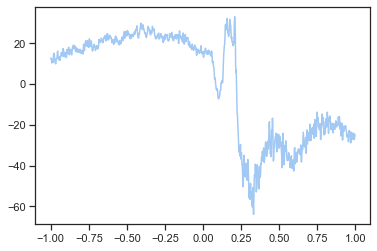

In [114]:
plt.plot(np.arange(-1, 1, 0.002), np.mean(trial_wise_channel, axis=0))
# plt.axvline(x=0.2, color='black')

# Motion analysis

In [123]:
main_js2 = js2[js2['currentscene']=='mainexperiment']

In [124]:
trial = 1
trial_js2 = main_js2[main_js2['trialnum']==trial]

In [125]:
trial_js2_exitLimbo = trial_js2[trial_js2['trialphase'] == 'exitLimbo']
hand_pos_z_arr = np.zeros(len(trial_js2_exitLimbo))
for i in range(len(trial_js2_exitLimbo)):
    hand_pos = trial_js2_exitLimbo['right_hand_position'].iloc[i]
    hand_pos_z = hand_pos[2]
    hand_pos_z_arr[i] = hand_pos_z
    
print(np.mean(hand_pos_z_arr), np.std(hand_pos_z_arr))

13.320722158138569 0.05264123892031439


In [126]:
hand_pos_z_means = np.zeros(220)
for trial in range(220):
    trial_js2 = main_js2[main_js2['trialnum']==trial]
    trial_js2_exitLimbo = trial_js2[trial_js2['trialphase'] == 'exitLimbo']
    hand_pos_z_arr = np.zeros(len(trial_js2_exitLimbo))
    for i in range(len(trial_js2_exitLimbo)):
        hand_pos = trial_js2_exitLimbo['right_hand_position'].iloc[i]
        hand_pos_z = hand_pos[2]
        hand_pos_z_arr[i] = hand_pos_z

    hand_pos_z_means[trial] = np.mean(hand_pos_z_arr)

/Users/jwp968/miniforge3/envs/pytorch_m1/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jwp968/miniforge3/envs/pytorch_m1/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


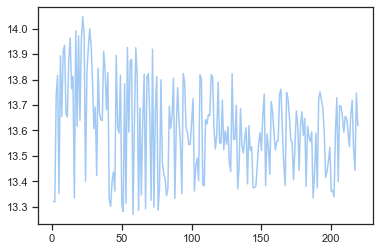

In [127]:
plt.plot(hand_pos_z_means)

In [128]:
np.mean(hand_pos_z_means[1:60]), np.mean(hand_pos_z_means[60:120]), np.mean(hand_pos_z_means[120:180]), np.mean(hand_pos_z_means[180:])

(13.685992971001951, 13.595899835183594, 13.564555387383765, 13.5652034588886)

In [129]:
# 13.623 is the z-pos of the inner bubble

# Subj 2 overriding subj 1

In [141]:
subj2_js2 = pd.read_json('FishTaskPilotData/Data/subj07/test__Device_Data_Unity_C_Sharp_Client_VR__.json')

In [142]:
main_js2 = subj2_js2[subj2_js2['currentscene']=='mainexperiment']

In [146]:
stimuli_js2 = main_js2[main_js2['trialphase']=='stimuli']
# approach_js2 = stimuli_js2[stimuli_js2['action']=='approach']
# withdrawal_js2 = stimuli_js2[stimuli_js2['action']=='withdrawal']
# inactive_approach_js2 = stimuli_js2[stimuli_js2['action']=='inactive_approach']
# inactive_withdrawal_js2 = stimuli_js2[stimuli_js2['action']=='inactive_withdrawal']

In [133]:
# approach_hand_pos_z_arr = np.zeros(len(approach_js2))
# for i in range(len(approach_js2)):
#         hand_pos = approach_js2['right_hand_position'].iloc[i]
#         hand_pos_z = hand_pos[2]
#         approach_hand_pos_z_arr[i] = hand_pos_z

# inactive_hand_pos_z_arr = np.zeros(len(inactive_js2))
# for i in range(len(inactive_js2)):
#         hand_pos = inactive_js2['right_hand_position'].iloc[i]
#         hand_pos_z = hand_pos[2]
#         inactive_hand_pos_z_arr[i] = hand_pos_z


In [134]:
# np.mean(approach_hand_pos_z_arr), np.std(approach_hand_pos_z_arr)

In [135]:
# approach_hand_pos_z_arr

In [136]:
# inactive_hand_pos_z_arr

In [145]:
all_hand_poz_z_arr = []
for trial in range(1,241):
    trial_stim_js2 = stimuli_js2[stimuli_js2['trialnum']==trial]
    hand_pos_z_arr = np.zeros(len(trial_stim_js2))
    for i in range(len(trial_stim_js2)):
        hand_pos = trial_stim_js2['right_hand_position'].iloc[i]
        hand_pos_z = hand_pos[2]
        hand_pos_z_arr[i] = hand_pos_z
    all_hand_poz_z_arr.append(np.array(hand_pos_z_arr))

In [138]:
# fig, ax = plt.subplots()
# for trial in range(240):
#     ax.plot(all_hand_poz_z_arr[trial]-13.62, 'grey', alpha=0.2)

# for trial in [65,95,98,194,218]:
#     ax.plot(all_hand_poz_z_arr[trial]-13.62, 'red', alpha=0.6)
# for trial in [7,79,198]:
#     ax.plot(all_hand_poz_z_arr[trial]-13.62, 'blue', alpha=0.6)
    
# ax.set_xlabel('time')
# ax.set_ylabel('approach-withdrawal')

In [147]:
com_withdrawal_to_approach = []
com_approach_to_withdrawal = []

tolerance = 0.15

for i in range(240):
    start_z_pos = all_hand_poz_z_arr[i][0]
    end_z_pos = all_hand_poz_z_arr[i][-1]
    max_z_pos = np.max(all_hand_poz_z_arr[i])
    min_z_pos = np.min(all_hand_poz_z_arr[i])
    if(end_z_pos<start_z_pos):
        if ((max_z_pos - start_z_pos) > tolerance*(start_z_pos - end_z_pos)):
            com_withdrawal_to_approach.append(i)
    if(end_z_pos>start_z_pos):
        if ((start_z_pos - min_z_pos) > tolerance*(end_z_pos - start_z_pos)):
            com_approach_to_withdrawal.append(i)       

Text(0, 0.5, 'withdrawal-approach')

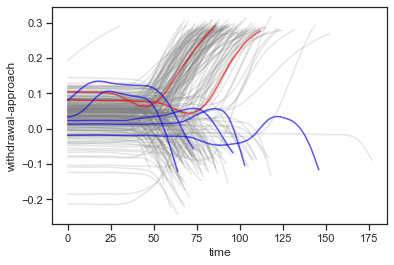

In [149]:
fig, ax = plt.subplots()
for trial in range(240):
    ax.plot(-(all_hand_poz_z_arr[trial]-13.62), 'grey', alpha=0.2)

for trial in com_withdrawal_to_approach:
    ax.plot(-(all_hand_poz_z_arr[trial]-13.62), 'red', alpha=0.6)
for trial in com_approach_to_withdrawal:
    ax.plot(-(all_hand_poz_z_arr[trial]-13.62), 'blue', alpha=0.6)
    
ax.set_xlabel('time')
ax.set_ylabel('withdrawal-approach')

In [153]:
normalized_hand_poz = -(np.array(all_hand_poz_z_arr)-13.62)

/var/folders/s6/b6fvq5p94z3_b9bh98gfbwqm0000gn/T/ipykernel_41322/3901035497.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  normalized_hand_poz = -(np.array(all_hand_poz_z_arr)-13.62)


Note to self:
Used PyDDM
also check https://www.biorxiv.org/content/biorxiv/early/2022/07/19/2022.06.19.496747.full.pdf

In [155]:
np.save('SUBJ07_normalized_hand_poz.npy', np.array(normalized_hand_poz))
np.save('SUBJ07_com_withdrawal_to_approach.npy', np.array(com_withdrawal_to_approach)+1)
np.save('SUBJ07_com_approach_to_withdrawal.npy', np.array(com_approach_to_withdrawal)+1)

# Plotting over omega quantiles

In [11]:
subj_range = new_subj_list
len(subj_range)

28

In [12]:
RL_Omega_Arr = np.load("RL_Omega_Arr.npy")
RLDDM_Omega_Arr = np.load("RLDDM_Omega_Arr.npy")

In [13]:
RL_Omega_Arr[0]

array([0.62660953, 0.61509451, 0.6019747 , 0.59029399, 0.57701657,
       0.56379794, 0.55220753, 0.53964247, 0.52672325, 0.51399128,
       0.50246329, 0.4911101 , 0.48034292, 0.46946763, 0.45752851,
       0.44585904, 0.43445995, 0.42516044, 0.41609009, 0.40722252,
       0.39817762, 0.38792345, 0.37940294, 0.37152604, 0.36249072,
       0.35385042, 0.34503954, 0.33745636, 0.33023637, 0.32372764,
       0.3161691 , 0.30960019, 0.30357657, 0.29658733, 0.29083122,
       0.2849371 , 0.27903098, 0.27245069, 0.26605947, 0.26086185,
       0.25582821, 0.25113412, 0.24553678, 0.23971382, 0.23407948,
       0.22969749, 0.22424083, 0.21936936, 0.21427457, 0.20916375,
       0.2045888 , 0.19983714, 0.19647482, 0.19184612, 0.18731375,
       0.18474973, 0.18038695, 0.17754754, 0.17461066, 0.17066606,
       0.16676597, 0.16428572, 0.16186068, 0.15949251, 0.1558572 ,
       0.15408071, 0.15053421, 0.14886351, 0.14540755, 0.14206439,
       0.13926891, 0.13647961, 0.13382653, 0.13203602, 0.12919

In [14]:
RL_model_choices = np.load("PAL4wb_all_y_pred_mean.npy")
RLDDM_model_choices = np.load("PAL4wb_rlddm_all_choice_os_mean.npy")
RLDDM_model_RTs = np.load("PAL4wb_rlddm_all_RT_os_mean.npy")

In [15]:
RLDDM_model_choices

array([[0.53675, 0.56075, 0.55075, ..., 0.35675, 0.30225, 0.31125],
       [0.55325, 0.53825, 0.51425, ..., 0.5455 , 0.45425, 0.52175],
       [0.6585 , 0.655  , 0.426  , ..., 0.581  , 0.28925, 0.51825],
       ...,
       [0.55575, 0.54825, 0.49575, ..., 0.34725, 0.33225, 0.35475],
       [0.482  , 0.48525, 0.46975, ..., 0.09775, 0.07575, 0.08175],
       [0.4265 , 0.43625, 0.41925, ..., 0.24875, 0.2265 , 0.235  ]])

In [16]:
RLDDM_model_RTs

array([[1.38524069, 1.37636999, 1.38041319, ..., 1.32891984, 1.31948394,
        1.32463594],
       [1.1680704 , 1.17167895, 1.1587039 , ..., 1.1579008 , 1.16479735,
        1.15677595],
       [1.88302048, 1.89259048, 1.91584083, ..., 1.89363943, 1.82153658,
        1.94081578],
       ...,
       [1.54842099, 1.53691179, 1.54403454, ..., 1.52066154, 1.51259019,
        1.52106739],
       [1.73617149, 1.74895084, 1.72793739, ..., 1.40727824, 1.32646974,
        1.36984804],
       [1.13899509, 1.15941719, 1.15398839, ..., 1.07193184, 1.07531484,
        1.08062434]])

In [17]:
ls

21_subj_hbayesdata.txt
28_subj_hbayesdata.txt
4_subj_hbayesdata.txt
EEG_preprocessing.ipynb
EEGraw/
FishTaskPilotData/
Jellyfish Task Update(1).svg
Jellyfish Task Update(2).svg
JellyfishExptIllustration.png
MNEstuff.ipynb
OFC_simulation.py
PAL4wb_all_y_pred_all.npy
PAL4wb_all_y_pred_mean.npy
PAL4wb_rlddm_all_RT_os_all.npy
PAL4wb_rlddm_all_RT_os_mean.npy
PAL4wb_rlddm_all_choice_os_all.npy
PAL4wb_rlddm_all_choice_os_mean.npy
Pilot_Analysis.ipynb
Preliminary_Analysis.ipynb
Processing_fitted_model.ipynb
RLDDM_Omega_Arr.npy
RL_Omega_Arr.npy
SUBJ07_com_approach_to_withdrawal.npy
SUBJ07_com_withdrawal_to_approach.npy
SUBJ07_normalized_hand_poz.npy
ShuangyiFullLiveAmpTest/
build/
data_df.csv
df_fit.csv
eeg_subj07.mat
eeg_subj07_subset.mat
eeg_subj07_subset.npy
events_subj07.txt
events_subj07_cue12_correct_response.txt
events_subj07_cue12_incorrect_response.txt
events_subj07_mne.txt
fit_RL.py
fit_RLDDM_hbayes.py
fit_RL_hbayes.py
full_seq.csv
get_data_in_hbayesdm_format.ipynb
motor_analysis/
out

In [18]:
behavioural_dfs = []
i=0
for subj_num in subj_range:
    print(subj_num)
    subj_str = str(subj_num).zfill(2)
    try:
        behavioural_df = pd.read_csv('FishTaskPilotData/Data/subj'+subj_str+'/SUBJ'+subj_str+'_Right.csv')
    except:
        behavioural_df = pd.read_csv('FishTaskPilotData/Data/subj'+subj_str+'/SUBJ'+subj_str+'_Left.csv')
    
    full_seq_df = pd.read_csv('full_seq.csv')
    behavioural_df = behavioural_df.join(full_seq_df)
    
    
    mapping = {'approach': 1, 'withdrawal': 0, 'inactive_approach': 1, 'inactive_withdrawal': 0}
    action_int = behavioural_df['Action'].replace(mapping)
    punishments = action_int*behavioural_df['resultGo'] + (1-action_int)*behavioural_df['resultNoGo']
    
    behavioural_df['action_int'] = action_int
    behavioural_df['punishment'] = punishments
    behavioural_df['Trial'] = behavioural_df['Trial']-1
    
    behavioural_df['RL_omega'] = RL_Omega_Arr[i]
    behavioural_df['RLDDM_omega'] = RLDDM_Omega_Arr[i]
    
    behavioural_df['RL_model_choices'] = RL_model_choices[i]
    behavioural_df['RLDDM_model_choices'] = RLDDM_model_choices[i]
    behavioural_df['RLDDM_model_RTs'] = RLDDM_model_RTs[i]
    
    print(behavioural_df)
    behavioural_dfs.append(behavioural_df)
    i=i+1

3
     Trial      Action  ReactionTime  TrialStartTime  TrialEndTime  \
0        1  withdrawal      0.455352        5.706191      9.938035   
1        2    approach      0.733081        9.948694     14.457910   
2        3    approach      0.855110       15.179810     19.811210   
3        4  withdrawal      1.188513       24.597890     29.562200   
4        5    approach      1.399611       30.073170     35.248340   
..     ...         ...           ...             ...           ...   
235    236    approach      1.588196     1378.380000   1383.743000   
236    237  withdrawal      1.410438     1383.754000   1388.941000   
237    238  withdrawal      1.688172     1388.952000   1394.415000   
238    239  withdrawal      1.188561     1394.426000   1399.389000   
239    240  withdrawal      1.532624     1399.400000   1404.708000   

     ShockGiven  cue1  cue2  cue3  cue4  resultGo  resultNoGo  action_int  \
0          True   0.0   0.0   1.0   0.0       0.0         1.0           0   
1  

     Trial      Action  ReactionTime  TrialStartTime  TrialEndTime  \
0        1    approach      0.910605        8.847404      13.53445   
1        2  withdrawal      0.688150       14.155680      18.61010   
2        3    approach      0.932853       18.621030      23.32985   
3        4    approach      0.910693       23.341270      28.02783   
4        5    approach      0.721638       28.083140      32.58132   
..     ...         ...           ...             ...           ...   
235    236  withdrawal      0.543992     1239.392000    1243.71300   
236    237    approach      0.966643     1243.824000    1248.56700   
237    238  withdrawal      0.644197     1249.044000    1253.46500   
238    239  withdrawal      0.677469     1253.854000    1258.30800   
239    240  withdrawal      0.576702     1258.630000    1262.98400   

     ShockGiven  cue1  cue2  cue3  cue4  resultGo  resultNoGo  action_int  \
0         False   0.0   0.0   1.0   0.0       0.0         1.0           1   
1    

     Trial      Action  ReactionTime  TrialStartTime  TrialEndTime  \
0        1  withdrawal      1.332648        4.847846      9.956641   
1        2    approach      1.022638       10.356330     15.154570   
2        3    approach      0.932898       16.498180     21.207280   
3        4    approach      1.132681       21.596000     26.504930   
4        5    approach      1.866039       26.626900     32.269010   
..     ...         ...           ...             ...           ...   
235    236  withdrawal      0.943806     1306.542000   1311.263000   
236    237    approach      1.388592     1311.274000   1316.438000   
237    238  withdrawal      0.977189     1316.527000   1321.281000   
238    239  withdrawal      1.066134     1321.292000   1326.135000   
239    240  withdrawal      0.821937     1326.146000   1330.744000   

     ShockGiven  cue1  cue2  cue3  cue4  resultGo  resultNoGo  action_int  \
0          True   0.0   0.0   1.0   0.0       0.0         1.0           0   
1    

In [19]:
behavioural_dfs[0]

,Trial,Action,ReactionTime,TrialStartTime,TrialEndTime,ShockGiven,cue1,cue2,cue3,cue4,resultGo,resultNoGo,action_int,punishment,RL_omega,RLDDM_omega,RL_model_choices,RLDDM_model_choices,RLDDM_model_RTs
0,1,withdrawal,0.455352,5.706191,9.938035,True,0.0,0.0,1.0,0.0,0.0,1.0,0,1.0,0.626610,0.682709,0.55475,0.53675,1.385241
1,2,approach,0.733081,9.948694,14.457910,False,0.0,0.0,0.0,1.0,0.0,1.0,1,0.0,0.615095,0.665416,0.54075,0.56075,1.376370
2,3,approach,0.855110,15.179810,19.811210,True,0.0,0.0,0.0,1.0,1.0,0.0,1,1.0,0.601975,0.646433,0.55125,0.55075,1.380413
3,4,withdrawal,1.188513,24.597890,29.562200,False,0.0,1.0,0.0,0.0,1.0,0.0,0,0.0,0.590294,0.628791,0.55625,0.52200,1.378610
4,5,approach,1.399611,30.073170,35.248340,False,0.0,0.0,1.0,0.0,0.0,0.0,1,0.0,0.577017,0.609802,0.51400,0.50775,1.360299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,236,approach,1.588196,1378.380000,1383.743000,True,0.0,1.0,0.0,0.0,1.0,0.0,1,1.0,0.032145,0.019956,0.38025,0.34750,1.356281
236,237,withdrawal,1.410438,1383.754000,1388.941000,True,1.0,0.0,0.0,0.0,0.0,1.0,0,1.0,0.031339,0.019201,0.55975,0.55150,1.384080
237,238,withdrawal,1.688172,1388.952000,1394.415000,False,0.0,1.0,0.0,0.0,1.0,0.0,0,0.0,0.031959,0.019854,0.37400,0.35675,1.328920
238,239,withdrawal,1.188561,1394.426000,1399.389000,False,0.0,0.0,0.0,1.0,1.0,0.0,0,0.0,0.031765,0.019678,0.30500,0.30225,1.319484


In [20]:
combined_all_subj_behavioural_df = pd.concat(behavioural_dfs, axis=0, join='outer')

In [21]:
combined_all_subj_behavioural_df

,Trial,Action,ReactionTime,TrialStartTime,TrialEndTime,ShockGiven,cue1,cue2,cue3,cue4,resultGo,resultNoGo,action_int,punishment,RL_omega,RLDDM_omega,RL_model_choices,RLDDM_model_choices,RLDDM_model_RTs
0,1,withdrawal,0.455352,5.706191,9.938035,True,0.0,0.0,1.0,0.0,0.0,1.0,0,1.0,0.626610,0.682709,0.55475,0.53675,1.385241
1,2,approach,0.733081,9.948694,14.457910,False,0.0,0.0,0.0,1.0,0.0,1.0,1,0.0,0.615095,0.665416,0.54075,0.56075,1.376370
2,3,approach,0.855110,15.179810,19.811210,True,0.0,0.0,0.0,1.0,1.0,0.0,1,1.0,0.601975,0.646433,0.55125,0.55075,1.380413
3,4,withdrawal,1.188513,24.597890,29.562200,False,0.0,1.0,0.0,0.0,1.0,0.0,0,0.0,0.590294,0.628791,0.55625,0.52200,1.378610
4,5,approach,1.399611,30.073170,35.248340,False,0.0,0.0,1.0,0.0,0.0,0.0,1,0.0,0.577017,0.609802,0.51400,0.50775,1.360299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,236,withdrawal,1.299243,1560.371000,1565.447000,False,0.0,1.0,0.0,0.0,1.0,0.0,0,0.0,0.078985,0.036695,0.29900,0.28775,1.094342
236,237,approach,1.288681,1566.757000,1571.822000,False,1.0,0.0,0.0,0.0,0.0,1.0,1,0.0,0.078831,0.036719,0.66200,0.65300,1.130244
237,238,inactive_withdrawal,2.510065,1574.209000,1580.495000,False,0.0,1.0,0.0,0.0,1.0,0.0,0,0.0,0.078097,0.036203,0.26650,0.24875,1.071932
238,239,approach,0.899821,1580.795000,1585.470000,True,0.0,0.0,0.0,1.0,1.0,0.0,1,1.0,0.077598,0.035893,0.24225,0.22650,1.075315


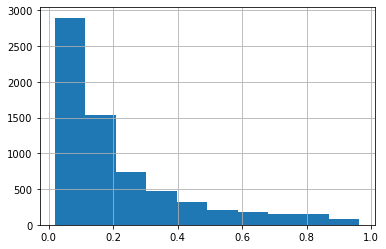

In [27]:
combined_all_subj_behavioural_df["RL_omega"].hist()

# Subject-wise aggregation

0.0630307685118309 0.10505516107675732 0.17479485315827656 0.3418322704573238 0.9629565283411996


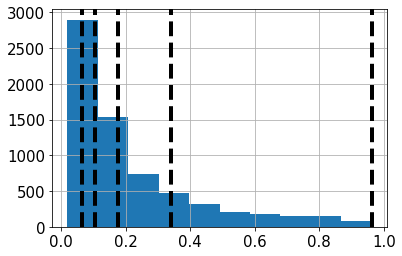

In [147]:
plt.rcParams.update({'font.size': 15})
combined_all_subj_behavioural_df["RL_omega"].hist()


q20 = np.quantile(combined_all_subj_behavioural_df["RL_omega"], 0.2)
q40 = np.quantile(combined_all_subj_behavioural_df["RL_omega"], 0.4)
q60 = np.quantile(combined_all_subj_behavioural_df["RL_omega"], 0.6)
q80 = np.quantile(combined_all_subj_behavioural_df["RL_omega"], 0.8)
q100 = np.quantile(combined_all_subj_behavioural_df["RL_omega"], 1)


plt.axvline(q20, linestyle="--", color="k", linewidth=4)
plt.axvline(q40, linestyle="--", color="k", linewidth=4)
plt.axvline(q60, linestyle="--", color="k", linewidth=4)
plt.axvline(q80, linestyle="--", color="k", linewidth=4)
plt.axvline(q100, linestyle="--", color="k", linewidth=4)

print(q20, q40, q60, q80, q100)

0.035333582769489676 0.06391546155676288 0.115701965731181 0.28126060042162115 0.9816599613170387


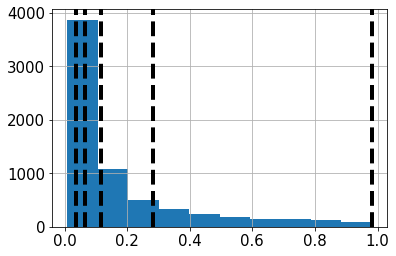

In [148]:
combined_all_subj_behavioural_df["RLDDM_omega"].hist()

q20 = np.quantile(combined_all_subj_behavioural_df["RLDDM_omega"], 0.2)
q40 = np.quantile(combined_all_subj_behavioural_df["RLDDM_omega"], 0.4)
q60 = np.quantile(combined_all_subj_behavioural_df["RLDDM_omega"], 0.6)
q80 = np.quantile(combined_all_subj_behavioural_df["RLDDM_omega"], 0.8)
q100 = np.quantile(combined_all_subj_behavioural_df["RLDDM_omega"], 1)

plt.axvline(q20, linestyle="--", color="k", linewidth=4)
plt.axvline(q40, linestyle="--", color="k", linewidth=4)
plt.axvline(q60, linestyle="--", color="k", linewidth=4)
plt.axvline(q80, linestyle="--", color="k", linewidth=4)
plt.axvline(q100, linestyle="--", color="k", linewidth=4)

print(q20, q40, q60, q80, q100)


In [194]:
which_omega = "RLDDM_omega"

all_subj_cue1_withdrawals = []
all_subj_cue2_withdrawals = []
all_subj_approachtimes = []
all_subj_withdrawaltimes = []
all_subj_cue1_withdrawals_RLmodelmean = []
all_subj_cue2_withdrawals_RLmodelmean = []

all_subj_withdrawal_bias = []


for subj_num in range(28):
    beh_df = behavioural_dfs[subj_num]
#     beh_df[which_omega].hist()
#     q20 = np.quantile(combined_all_subj_behavioural_df[which_omega], 0.2)
#     q40 = np.quantile(combined_all_subj_behavioural_df[which_omega], 0.4)
#     q60 = np.quantile(combined_all_subj_behavioural_df[which_omega], 0.6)
#     q80 = np.quantile(combined_all_subj_behavioural_df[which_omega], 0.8)
#     q100 = np.quantile(combined_all_subj_behavioural_df[which_omega], 1)
    
    q20 = np.quantile(beh_df[which_omega], 0.2)
    q40 = np.quantile(beh_df[which_omega], 0.4)
    q60 = np.quantile(beh_df[which_omega], 0.6)
    q80 = np.quantile(beh_df[which_omega], 0.8)
    q100 = np.quantile(beh_df[which_omega], 1)
    
#     print(q20, q40, q60, q80, q100)
    
    q20_df = beh_df[beh_df[which_omega]<q20]

    q40_df = beh_df[beh_df[which_omega]<q40]
    q40_df = q40_df[q40_df[which_omega]>q20]

    q60_df = beh_df[beh_df[which_omega]<q60]
    q60_df = q60_df[q60_df[which_omega]>q40]

    q80_df = beh_df[beh_df[which_omega]<q80]
    q80_df = q80_df[q80_df[which_omega]>q60]

    q100_df = beh_df[beh_df[which_omega]<q100]
    q100_df = q100_df[q100_df[which_omega]>q80]
    
    print(len(q20_df), len(q40_df), len(q60_df), len(q80_df), len(q100_df))
    
    cue1_withdrawals=[sum(q20_df.loc[q20_df['cue1']==1]['action_int']==0),\
                      sum(q40_df.loc[q40_df['cue1']==1]['action_int']==0),\
                      sum(q60_df.loc[q60_df['cue1']==1]['action_int']==0),\
                      sum(q80_df.loc[q80_df['cue1']==1]['action_int']==0),\
                      sum(q100_df.loc[q100_df['cue1']==1]['action_int']==0)]
    
    cue1_approaches=[sum(q20_df.loc[q20_df['cue1']==1]['action_int']==1),\
                      sum(q40_df.loc[q40_df['cue1']==1]['action_int']==1),\
                      sum(q60_df.loc[q60_df['cue1']==1]['action_int']==1),\
                      sum(q80_df.loc[q80_df['cue1']==1]['action_int']==1),\
                      sum(q100_df.loc[q100_df['cue1']==1]['action_int']==1)]
    
    cue2_withdrawals=[sum(q20_df.loc[q20_df['cue2']==1]['action_int']==0),\
                      sum(q40_df.loc[q40_df['cue2']==1]['action_int']==0),\
                      sum(q60_df.loc[q60_df['cue2']==1]['action_int']==0),\
                      sum(q80_df.loc[q80_df['cue2']==1]['action_int']==0),\
                      sum(q100_df.loc[q100_df['cue2']==1]['action_int']==0)]
    
    cue2_approaches=[sum(q20_df.loc[q20_df['cue2']==1]['action_int']==1),\
                      sum(q40_df.loc[q40_df['cue2']==1]['action_int']==1),\
                      sum(q60_df.loc[q60_df['cue2']==1]['action_int']==1),\
                      sum(q80_df.loc[q80_df['cue2']==1]['action_int']==1),\
                      sum(q100_df.loc[q100_df['cue2']==1]['action_int']==1)]
    
    approachtimes=[np.mean(q20_df.loc[q20_df['action_int']==1]["ReactionTime"]),\
                  np.mean(q40_df.loc[q40_df['action_int']==1]["ReactionTime"]),\
                  np.mean(q60_df.loc[q60_df['action_int']==1]["ReactionTime"]),\
                  np.mean(q80_df.loc[q80_df['action_int']==1]["ReactionTime"]),\
                  np.mean(q100_df.loc[q100_df['action_int']==1]["ReactionTime"])]
    
    withdrawaltimes=[np.mean(q20_df.loc[q20_df['action_int']==0]["ReactionTime"]),\
                  np.mean(q40_df.loc[q40_df['action_int']==0]["ReactionTime"]),\
                  np.mean(q60_df.loc[q60_df['action_int']==0]["ReactionTime"]),\
                  np.mean(q80_df.loc[q80_df['action_int']==0]["ReactionTime"]),\
                  np.mean(q100_df.loc[q100_df['action_int']==0]["ReactionTime"])]
    
    withdrawal_bias = (np.array(cue2_withdrawals) - np.array(cue1_approaches))/48
    
    print(np.array(cue2_withdrawals) - np.array(cue1_approaches), 48)
    
    
#     RLmodel_mean_cue1_withdrawals=[sum(1- q100_df.loc[q100_df['cue1']==1]['RL_model_choices']),\
#                                   sum(1- q80_df.loc[q80_df['cue1']==1]['RL_model_choices']),\
#                                   sum(1- q60_df.loc[q60_df['cue1']==1]['RL_model_choices']),\
#                                   sum(1- q40_df.loc[q40_df['cue1']==1]['RL_model_choices']),\
#                                   sum(1- q20_df.loc[q20_df['cue1']==1]['RL_model_choices'])]
    
#     RLmodel_mean_cue2_withdrawals=[sum(1- q100_df.loc[q100_df['cue2']==1]['RL_model_choices']),\
#                                   sum(1- q80_df.loc[q80_df['cue2']==1]['RL_model_choices']),\
#                                   sum(1- q60_df.loc[q60_df['cue2']==1]['RL_model_choices']),\
#                                   sum(1- q40_df.loc[q40_df['cue2']==1]['RL_model_choices']),\
#                                   sum(1- q20_df.loc[q20_df['cue2']==1]['RL_model_choices'])]
    
    
    all_subj_cue1_withdrawals.append(cue1_withdrawals)
    all_subj_cue2_withdrawals.append(cue2_withdrawals)
    
    all_subj_withdrawal_bias.append(withdrawal_bias)
    
    all_subj_approachtimes.append(approachtimes)
    all_subj_withdrawaltimes.append(withdrawaltimes)
#     all_subj_cue1_withdrawals_RLmodelmean.append(RLmodel_mean_cue1_withdrawals)
#     all_subj_cue2_withdrawals_RLmodelmean.append(RLmodel_mean_cue2_withdrawals)

48 48 48 48 47
[-1  1 -1 -4  3] 48
48 48 48 48 47
[-3  5 -2 -2  0] 48
48 48 48 48 47
[-2  0  1 -2  3] 48
48 48 48 48 47
[-2  5 -1  1  1] 48
48 48 48 48 47
[0 2 1 0 7] 48
48 48 48 48 47
[-1  6  0 -6 -1] 48
48 48 48 48 47
[-2  3 -1 -2 -3] 48
48 48 48 48 47
[-2  4 -3 -7 -4] 48
48 48 48 48 47
[ 0  3 -5 -6  5] 48
48 48 48 48 47
[ 0  2 -1 -2  6] 48
48 48 48 48 47
[-3 10  2  3  1] 48
48 48 48 48 47
[ 0  6  0 -1  2] 48
48 48 48 48 47
[-2  4  3  0  7] 48
48 48 48 48 47
[-2  4 -2 -1  2] 48
48 48 48 48 47
[-2 10  2 -6  2] 48
48 48 48 48 47
[-1  2 -2  1  8] 48
48 48 48 48 47
[-2  4 -2 -4 -2] 48
48 48 48 48 47
[-1  5  3 -3  0] 48
48 48 48 48 47
[-2  2 -5 -7 -2] 48
48 48 48 48 47
[-5  2 -3 -4 -1] 48
48 48 48 48 47
[ 1  3 -2 -2  2] 48
48 48 48 48 47
[-2  5 -2 -2  2] 48
48 48 48 48 47
[-2  5 -5 -4  0] 48
48 48 48 48 47
[-2  5 -1 -5 -3] 48
48 48 48 48 47
[-6 -1 -9 -9 -2] 48
48 48 48 48 47
[ 0  4 -5 -2  0] 48
48 48 48 48 47
[-1  4  2  3  3] 48
48 48 48 48 47
[5 7 2 3 4] 48


In [195]:
all_subj_cue1_withdrawals = np.array(all_subj_cue1_withdrawals)
all_subj_cue2_withdrawals = np.array(all_subj_cue2_withdrawals)

In [196]:
all_subj_cue2_withdrawals

array([[ 9,  5,  4,  5,  8],
       [11, 15,  9, 14,  9],
       [ 9,  9,  5,  6,  8],
       [12, 14,  9, 14,  7],
       [13, 13,  9, 14,  9],
       [11, 15,  8,  7,  8],
       [12, 12,  8, 14,  6],
       [12, 14,  8,  9,  5],
       [10, 13,  6,  6,  9],
       [12, 14,  9, 14, 10],
       [11, 14,  9, 14,  8],
       [13, 12,  9, 14,  6],
       [11, 15,  9,  7, 10],
       [12, 14,  9, 14, 11],
       [11, 13,  9, 10,  9],
       [12, 13,  7, 14,  9],
       [12, 14,  9, 12,  7],
       [11, 14,  9, 13,  9],
       [11, 13,  4,  5,  5],
       [ 8, 12,  5, 12,  7],
       [12, 14,  9, 12,  7],
       [11, 15,  9, 14, 11],
       [11, 15,  7, 12,  9],
       [11, 13,  9, 10,  5],
       [ 5,  9,  2,  6,  7],
       [10,  9,  3,  7,  8],
       [13, 10, 11, 15,  9],
       [10, 12,  7, 11,  8]])

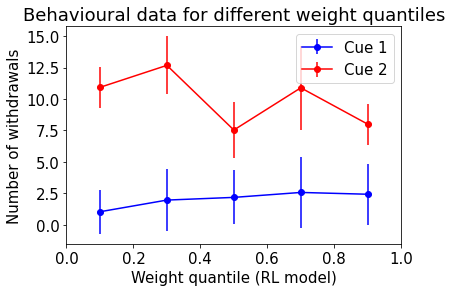

In [197]:
# plt.plot([0.1, 0.3, 0.5, 0.7, 0.9], np.mean(all_subj_cue1_withdrawals, axis=0), label="Cue 1", color='b')
# plt.plot([0.1, 0.3, 0.5, 0.7, 0.9], np.mean(all_subj_cue2_withdrawals, axis=0), label="Cue 2", color='r')

plt.errorbar([0.1, 0.3, 0.5, 0.7, 0.9], np.mean(all_subj_cue1_withdrawals, axis=0), np.std(all_subj_cue1_withdrawals, axis=0), linestyle='-', marker='o', label="Cue 1", color='b')
plt.errorbar([0.1, 0.3, 0.5, 0.7, 0.9], np.mean(all_subj_cue2_withdrawals, axis=0), np.std(all_subj_cue2_withdrawals, axis=0), linestyle='-', marker='o', label="Cue 2", color='r')


# for i in range(5):
#     y = all_subj_cue1_withdrawals[:,0]
#     x = np.random.normal(0.1+i, 0.001, size=len(y))
#     plt.plot(x, y, 'b.', alpha=0.2)


plt.ylabel("Number of withdrawals")
plt.xlabel("Weight quantile (RL model)")
plt.xlim([0,1])
plt.title("Behavioural data for different weight quantiles")
plt.legend()

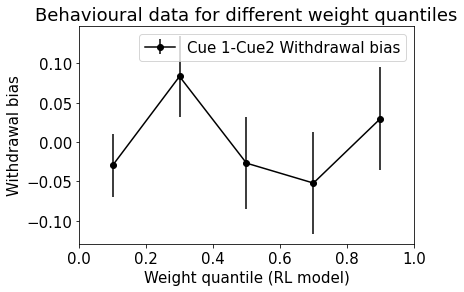

In [198]:

plt.errorbar([0.1, 0.3, 0.5, 0.7, 0.9], np.mean(all_subj_withdrawal_bias, axis=0), np.std(all_subj_withdrawal_bias, axis=0), linestyle='-', marker='o', label="Cue 1-Cue2 Withdrawal bias", color='k')


# for i in range(5):
#     y = all_subj_cue1_withdrawals[:,0]
#     x = np.random.normal(0.1+i, 0.001, size=len(y))
#     plt.plot(x, y, 'b.', alpha=0.2)


plt.ylabel("Withdrawal bias")
plt.xlabel("Weight quantile (RL model)")
plt.xlim([0,1])
plt.title("Behavioural data for different weight quantiles")
plt.legend()

In [180]:
all_subj_cue2_withdrawals_df = pd.DataFrame(all_subj_cue2_withdrawals)

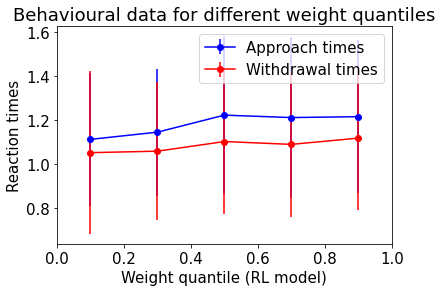

In [181]:
plt.errorbar([0.1, 0.3, 0.5, 0.7, 0.9], np.mean(all_subj_approachtimes, axis=0), np.std(all_subj_approachtimes, axis=0), linestyle='-', marker='o', label="Approach times", color='b')
plt.errorbar([0.1, 0.3, 0.5, 0.7, 0.9], np.mean(all_subj_withdrawaltimes, axis=0), np.std(all_subj_withdrawaltimes, axis=0), linestyle='-', marker='o', label="Withdrawal times", color='r')


# for i in range(5):
#     y = all_subj_cue1_withdrawals[:,0]
#     x = np.random.normal(0.1+i, 0.001, size=len(y))
#     plt.plot(x, y, 'b.', alpha=0.2)


plt.ylabel("Reaction times")
plt.xlabel("Weight quantile (RL model)")
plt.xlim([0,1])
plt.title("Behavioural data for different weight quantiles")
plt.legend()

In [ ]:
plt.errorbar([0.1, 0.3, 0.5, 0.7, 0.9], np.mean(all_subj_approachtimes - all_subj_withdrawaltimes, axis=0), np.std(all_subj_approachtimes - all_subj_withdrawaltimes, axis=0), linestyle='-', marker='o', label="Approach times", color='b')
plt.errorbar([0.1, 0.3, 0.5, 0.7, 0.9], np.mean(all_subj_withdrawaltimes, axis=0), np.std(all_subj_withdrawaltimes, axis=0), linestyle='-', marker='o', label="Withdrawal times", color='r')


# for i in range(5):
#     y = all_subj_cue1_withdrawals[:,0]
#     x = np.random.normal(0.1+i, 0.001, size=len(y))
#     plt.plot(x, y, 'b.', alpha=0.2)


plt.ylabel("Reaction times")
plt.xlabel("Weight quantile (RL model)")
plt.xlim([0,1])
plt.title("Behavioural data for different weight quantiles")
plt.legend()

# Global PPC

In [201]:
combined_all_subj_behavioural_df[combined_all_subj_behavioural_df['cue1']==1]

,Trial,Action,ReactionTime,TrialStartTime,TrialEndTime,ShockGiven,cue1,cue2,cue3,cue4,resultGo,resultNoGo,action_int,punishment,RL_omega,RLDDM_omega,RL_model_choices,RLDDM_model_choices,RLDDM_model_RTs
8,9,approach,1.077252,58.67154,63.52489,False,1.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.526723,0.539006,0.54125,0.53950,1.387603
14,15,approach,0.821620,90.33498,94.93288,False,1.0,0.0,0.0,0.0,0.0,1.0,1,0.0,0.457529,0.444000,0.55700,0.53075,1.368242
18,19,withdrawal,1.210654,125.27470,130.26160,True,1.0,0.0,0.0,0.0,0.0,1.0,0,1.0,0.416090,0.388802,0.53700,0.54100,1.370936
22,23,approach,1.132817,147.78710,152.69550,True,1.0,0.0,0.0,0.0,1.0,0.0,1,1.0,0.379403,0.341842,0.57375,0.59050,1.351216
26,27,approach,1.432879,171.37610,176.58500,False,1.0,0.0,0.0,0.0,0.0,1.0,1,0.0,0.345040,0.299807,0.47125,0.46050,1.352160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,228,withdrawal,0.677262,1516.03600,1520.49100,True,1.0,0.0,0.0,0.0,0.0,1.0,0,1.0,0.080867,0.036671,0.65350,0.63575,1.123555
229,230,withdrawal,0.721879,1525.46600,1529.96400,True,1.0,0.0,0.0,0.0,1.0,1.0,0,1.0,0.081046,0.037393,0.63550,0.63575,1.139846
230,231,approach,1.643545,1529.97500,1535.39500,False,1.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.080267,0.036865,0.62325,0.62650,1.142187
231,232,approach,1.088682,1536.97200,1541.83600,False,1.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.079656,0.036489,0.65975,0.65525,1.130020


In [223]:
data1 = np.sum(combined_all_subj_behavioural_df[combined_all_subj_behavioural_df['cue1']==1]['action_int'])/1680

In [224]:
model1 = np.sum(combined_all_subj_behavioural_df[combined_all_subj_behavioural_df['cue1']==1]['RL_model_choices']>0.5)/1680

In [225]:
data2 = np.sum(combined_all_subj_behavioural_df[combined_all_subj_behavioural_df['cue2']==1]['action_int'])/1680

In [226]:
model2 = np.sum(combined_all_subj_behavioural_df[combined_all_subj_behavioural_df['cue2']==1]['RL_model_choices']>0.5)/1680

In [227]:
data3 = np.sum(combined_all_subj_behavioural_df[combined_all_subj_behavioural_df['cue3']==1]['action_int'])/1680

In [228]:
model3 = np.sum(combined_all_subj_behavioural_df[combined_all_subj_behavioural_df['cue3']==1]['action_int'])/1680

In [229]:
data4 = np.sum(combined_all_subj_behavioural_df[combined_all_subj_behavioural_df['cue4']==1]['action_int'])/1680

In [230]:
model4 = np.sum(combined_all_subj_behavioural_df[combined_all_subj_behavioural_df['cue4']==1]['RL_model_choices']>0.5)/1680

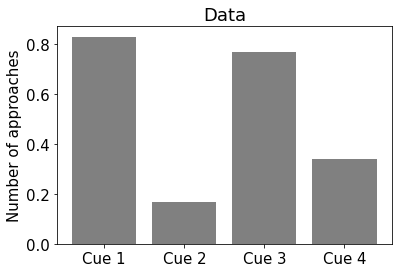

In [261]:
fig, ax = plt.subplots()
ax.bar([1,2,3, 4], [data1, data2, data3, data4], color='grey')
ax.set(xticks = [1, 2, 3, 4], xticklabels=["Cue 1", "Cue 2", "Cue 3", "Cue 4"])
ax.set_ylabel("Number of approaches")
ax.set_title("Data")
plt.savefig('DataPPC_RLmodel.png', dpi=1500)

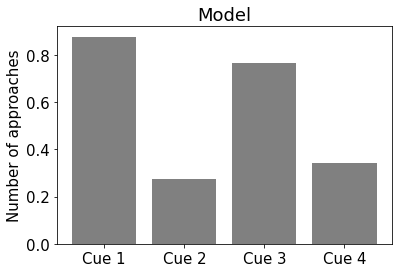

In [260]:
fig, ax = plt.subplots()
ax.bar([1,2,3, 4], [model1, model2, model3, model4], color='grey')
ax.set(xticks = [1, 2, 3, 4], xticklabels=["Cue 1", "Cue 2", "Cue 3", "Cue 4"])
ax.set_ylabel("Number of approaches")
ax.set_title("Model")
plt.savefig('ModelPPC_RLmodel.png', dpi=1500)